In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (15, 10)

In [ ]:
import pandas as pd
import numpy as np

import os
import warnings
from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

mlb_statcast_18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/68346_KBO_foreign_pitcher_data/baseball_savant_foreigners_2011_2018.csv')
mlb_18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/68346_KBO_foreign_pitcher_data/fangraphs_foreigners_2011_2018.csv')
kbo_18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/68346_KBO_foreign_pitcher_data/kbo_yearly_foreigners_2011_2018.csv')

mlb_19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/68346_KBO_foreign_pitcher_data/fangraphs_foreigners_2019.csv')
mlb_statcast_19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/68346_KBO_foreign_pitcher_data/baseball_savant_foreigners_2019.csv')

kbo_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/68346_KBO_foreign_pitcher_data/kbo_data.csv')

#  < EDA 1 > 데이터 살펴보기 & 시각화

##  #1. 'KBO + MLB + KBO입성전 MLB' 역대 정규시즌 성적

### (1) 데이터 정보



In [ ]:
a=kbo_18.shape
b=mlb_19.shape
c=mlb_18.shape

print(a, b, c)

(105, 11) (41, 19) (205, 19)


In [ ]:
a=kbo_18.info()
b=mlb_19.info()
c=mlb_18.info()

print(a, b, c)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pitcher_name  105 non-null    object 
 1   year          105 non-null    int64  
 2   team          105 non-null    object 
 3   ERA           105 non-null    float64
 4   TBF           105 non-null    int64  
 5   H             105 non-null    int64  
 6   HR            105 non-null    int64  
 7   BB            105 non-null    int64  
 8   HBP           105 non-null    int64  
 9   SO            105 non-null    int64  
 10  year_born     13 non-null     object 
dtypes: float64(1), int64(7), object(3)
memory usage: 9.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pitcher_name  41 non-null     object 
 1   year          41 non-null     float64

In [ ]:
# kbo_18.head()
# mlb_18.head()
mlb_statcast_18.head()

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,0,0,-0.604558,1.912833,-0.626,2.771,-6.404,26.077,-9.694,NaN,NaN,NaN,4-Seam Fastball,니퍼트
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,3,2,-0.857842,1.909967,-0.112,2.401,-10.168,28.786,-8.895,NaN,NaN,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,3,1,-0.536367,2.014600,0.272,3.052,-5.605,26.657,-7.794,NaN,NaN,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,2,1,-0.806350,2.167967,-1.193,0.632,-9.099,30.273,-6.371,NaN,NaN,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,1,1,-0.571158,1.818233,0.370,1.383,-5.846,27.290,-11.262,NaN,NaN,NaN,4-Seam Fastball,니퍼트


*   pitcher_name: 투수이름
*   year: 연도
*   team: 소속팀
*   ERA: 평균자책점 (그 투수의 9 이닝당의 자책점. 즉, 평균자책점=(9×자책점)÷투구이닝)
*   TBF: 상대한 타자 수
*   H: 피안타 수
*   HR: 피홈런 수
*   BB: 피볼넷 수
*   HBP: 피사구 수
*   SO: 삼진 수
*   year_born: 생년월일
-------------------------------------------MLB----------------------------------------------------
*   WHIP: 이닝당 출루 허용률 ( 피안타+볼넷이닝 / 이닝 )
*   BABIP: 인플레이 타구 안타 비율 ( 피안타-피홈런 / 타수-삼진-피홈런+희생번트+희생플라이 )
*   FIP: 수비 무관 자책점 ( 13×피홈런+3×피볼넷+피사구-2×삼진 / 투수가 던진 이닝+상수 )
*   LD%: 라인드라이브 비율 ( 라인드라이브 / 인플레이타구 )
*   GB%: 땅볼 비율 ( 땅볼 / 인플레이타구 )
*   FB%: 플라이볼 비율 ( 플라이볼 / 인플레이타구 )
*   IFFB%: 플라이볼 중 인필드 플라이볼 비율 ( 인필드 플라이볼 / 플라이볼 )
*   SwStr%: 헛스윙 비율 ( 헛스윙 / 전체 투구수 )
*   Swing%: 스윙 비율 ( 스윙 / 전체 투구수 )


### (2) 누락값 및 이상치 확인

In [ ]:
# 누락값 확인(다 없음)
# kbo_18.apply(lambda x: pd.isna(x).sum())
# mlb_19.apply(lambda x: pd.isna(x).sum())
mlb_18.apply(lambda x: pd.isna(x).sum())

pitcher_name    0
year            0
ERA             0
WAR             0
TBF             0
H               0
HR              0
BB              0
HBP             0
SO              0
WHIP            0
BABIP           0
FIP             0
LD%             0
GB%             0
FB%             0
IFFB%           0
SwStr%          0
Swing%          0
dtype: int64

In [ ]:
# 이상치 확인
# kbo_18[kbo_18[['ERA','TBF','H','HR','BB','HBP','SO']]<0]
# mlb_19[kbo_18[['ERA','TBF','H','HR','BB','HBP','SO','WHIP','BABIP','FIP','LD%','GB%','FB%','IFFB%','SwStr%','Swing%']]<0]
# mlb_18[kbo_18[['ERA','TBF','H','HR','BB','HBP','SO','WHIP','BABIP','FIP','LD%','GB%','FB%','IFFB%','SwStr%','Swing%']]<0]

### (3) 변수 살펴보기

#### pitcher_name

In [ ]:
# 역대 KBO 정규시즌  성적
kbo_18.pitcher_name.unique() 

array(['니퍼트', '다이아몬드', '듀브론트', '레나도', '레온', '레이예스', '레일리', '로저스', '루카스',
       '리즈', '린드블럼', '마리몬', '마야', '맨쉽', '밴덴헐크', '베렛', '보니야', '보우덴',
       '볼스테드', '브리검', '비야누에바', '샘슨', '서캠프', '세든', '소사', '스와잭', '스틴슨',
       '아담', '아델만', '앨버스', '어센시오', '어윈', '에반', '오간도', '오설리반', '올슨', '울프',
       '웨버', '웹스터', '이브랜드', '지크', '카스티요', '코엘로', '코프랜드', '클로이드', '탈보트',
       '토마스', '티포드', '팻딘', '플란데', '피가로', '피노', '피어밴드', '해커', '허프', '험버',
       '헥터', '후랭코프', '휠러', '산체스', '윌슨', '헤일'], dtype=object)

In [ ]:
# 역대 MLB 정규시즌 성적
mlb_19.pitcher_name.unique() 

array(['버틀러', '터너', '맥과이어', '서폴드', '켈리', '루친스키', '톰슨', '쿠에바스', '윌랜드',
       '헤일리', '채드벨', '요키시', '알칸타라'], dtype=object)

In [ ]:
# KBO 영입이전, 역대 MLB 정규시즌 성적
mlb_18.pitcher_name.unique() 

array(['오간도', '험버', '루카스', '다이아몬드', '듀브론트', '스와잭', '탈보트', '비야누에바', '로저스',
       '볼스테드', '앨버스', '레이예스', '에반', '피노', '린드블럼', '헤일', '맨쉽', '플란데',
       '이브랜드', '허프', '윌슨', '지크', '헥터', '웹스터', '코엘로', '샘슨', '클로이드', '세든',
       '코프랜드', '소사', '베렛', '오설리반', '아델만', '보니야', '올슨', '벨레스터', '피어밴드',
       '어윈', '서캠프', '울프', '마야', '팻딘', '해커', '티포드', '보우덴', '레온', '피가로',
       '어센시오', '레나도', '토마스', '웨버', '카스티요', '스틴슨', '아담', '후랭코프', '휠러',
       '리즈', '레일리', '니퍼트', '산체스'], dtype=object)

In [ ]:
print(kbo_18.pitcher_name.nunique() )
print(mlb_19.pitcher_name.nunique()) 
print(mlb_18.pitcher_name.nunique())

62
13
60


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text major ticklabel objects>)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


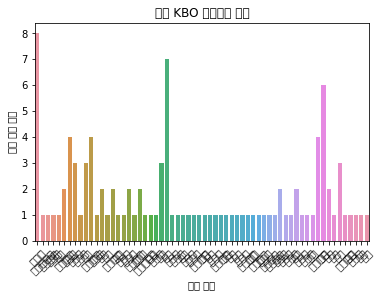

In [ ]:
# 선수들 참여 시즌횟수
pn = plt.subplots()
pn = sns.countplot('pitcher_name',data=kbo_18)
pn.set_title('역대 KBO 정규시즌 성적')
pn.set_xlabel('선수 이름')
pn.set_ylabel('시즌 참가 횟수')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

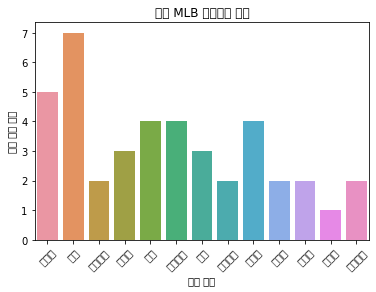

In [ ]:
# 선수들 참여 시즌횟수
pn = plt.subplots()
pn = sns.countplot('pitcher_name',data=mlb_19)
pn.set_title('역대 MLB 정규시즌 성적')
pn.set_xlabel('선수 이름')
pn.set_ylabel('시즌 참가 횟수')
plt.xticks(rotation=45)
#####################plt.figure(figsize=(108, 144))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text major ticklabel objects>)

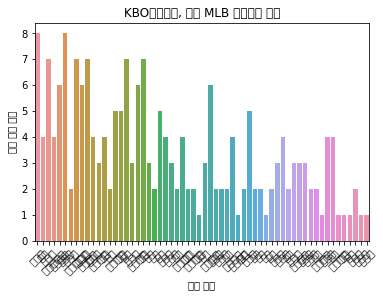

In [ ]:
# 선수들 참여 시즌횟수
pn = plt.subplots()
pn = sns.countplot('pitcher_name',data=mlb_18)
pn.set_title('KBO영입이전, 역대 MLB 정규시즌 성적')
pn.set_xlabel('선수 이름')
pn.set_ylabel('시즌 참가 횟수')
plt.xticks(rotation=45)

#### year

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

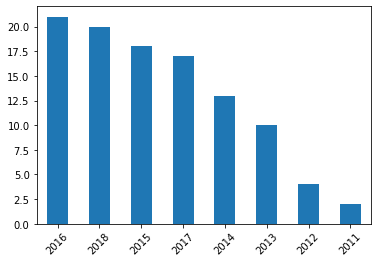

In [ ]:
# 몇년도에 가장 많이 영입을 했는가
kbo_18['year'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

#### team

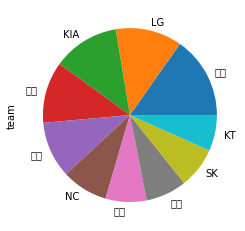

In [ ]:
# 영입된 선수들이 속한 팀
kbo_18['team'].value_counts().plot(kind='pie')

#### ERA, TBF, H, HR, BB, HBP, SO


*   ERA: 평균자책점 (그 투수의 9 이닝당의 자책점. 즉, 평균자책점=(9×자책점)÷투구이닝)
*   TBF: 상대한 타자 수
*   H: 피안타 수
*   HR: 피홈런 수
*   BB: 피볼넷 수
*   HBP: 피사구 수
*   SO: 삼진 수

In [ ]:
#kbo_18[['ERA','TBF','H','HR','BB','HBP','SO']].describe()
#mlb_19[['ERA','TBF','H','HR','BB','HBP','SO','WHIP','BABIP','FIP','LD%','GB%','FB%','IFFB%','SwStr%','Swing%']].describe()
mlb_18[['ERA','TBF','H','HR','BB','HBP','SO','WHIP','BABIP','FIP','LD%','GB%','FB%','IFFB%','SwStr%','Swing%']].describe()

,ERA,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,5.750585,193.160976,47.580488,6.000000,16.560976,1.653659,31.531707,1.632146,0.317537,5.146927,0.219590,0.423068,0.581800,0.086356,0.083566,0.455546
std,3.404285,186.000312,45.454563,6.105285,15.949136,1.852939,31.857299,0.539738,0.074553,1.982124,0.070459,0.098456,0.097976,0.072566,0.028714,0.038044
min,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.160000,0.000000,0.118000,0.260000,0.000000,0.000000,0.343000
25%,4.050000,57.000000,15.000000,1.000000,5.000000,0.000000,9.000000,1.340000,0.281000,4.090000,0.184000,0.367000,0.526000,0.036000,0.064000,0.433000
50%,5.200000,126.000000,32.000000,4.000000,12.000000,1.000000,21.000000,1.500000,0.310000,4.830000,0.212000,0.423000,0.585000,0.085000,0.081000,0.458000
75%,6.750000,263.000000,65.000000,8.000000,23.000000,2.000000,43.000000,1.780000,0.350000,5.600000,0.250000,0.473000,0.652000,0.121000,0.100000,0.473000
max,27.000000,827.000000,187.000000,29.000000,88.000000,8.000000,167.000000,5.000000,0.667000,15.050000,0.600000,0.833000,0.878000,0.500000,0.200000,0.636000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e72e1a150>,
      dtype=object)

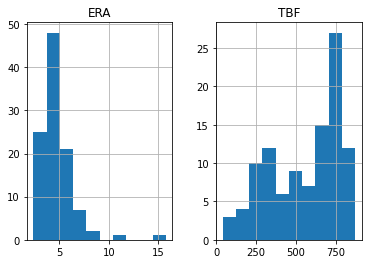

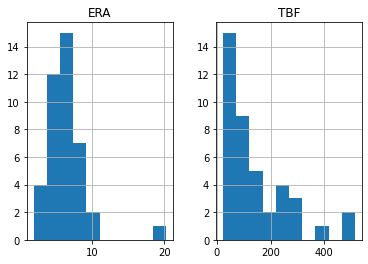

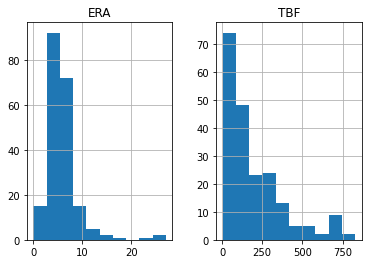

In [ ]:
kbo_18[['ERA','TBF']].hist()
mlb_19[['ERA','TBF']].hist()
mlb_18[['ERA','TBF']].hist()

* KBO와 MLB(KBO영입이전 포함)의 ERA는 분포도가 유사함
* TBF는 MLB끼리는 비슷하지만, KBO는 편향 방향이 정반대

=> 외국인 투수 의존도가 높나?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e72b21b50>,
      dtype=object)

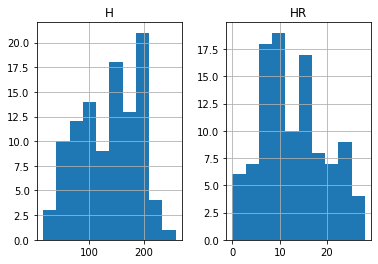

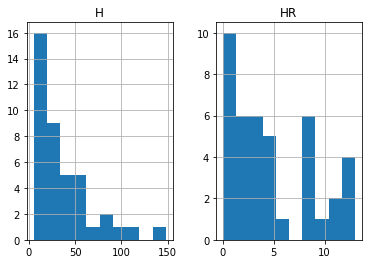

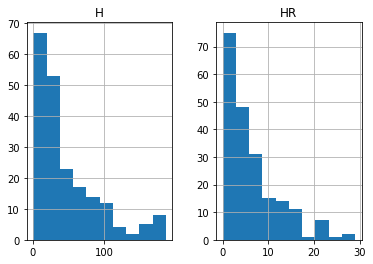

In [ ]:
kbo_18[['H','HR']].hist()
mlb_19[['H','HR']].hist()
mlb_18[['H','HR']].hist()

* KBO에서 더 못했네
* KBO에서 얼마나 적응했는가

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e7296f050>,
      dtype=object)

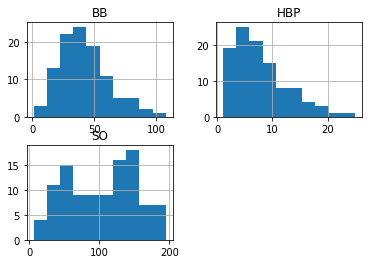

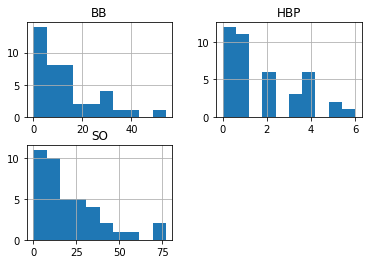

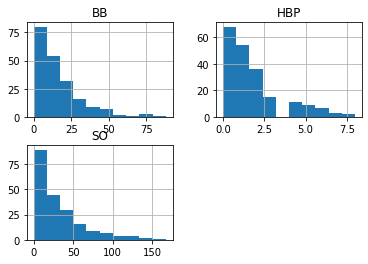

In [ ]:
kbo_18[['BB','HBP','SO']].hist()
mlb_19[['BB','HBP','SO']].hist()
mlb_18[['BB','HBP','SO']].hist()

* 피볼넷 수 제외 분포 비슷

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e7257e250>,
      dtype=object)

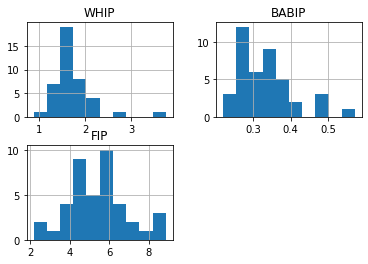

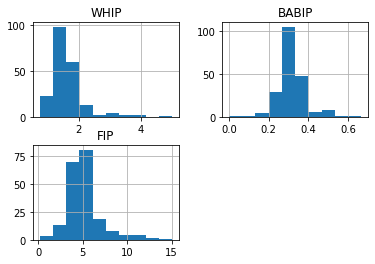

In [ ]:
mlb_19[['WHIP','BABIP','FIP']].hist()
mlb_18[['WHIP','BABIP','FIP']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e7243b710>,
      dtype=object)

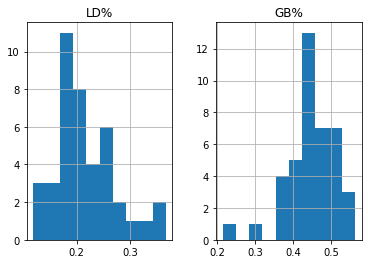

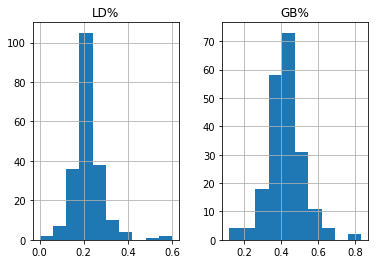

In [ ]:
mlb_19[['LD%','GB%']].hist()
mlb_18[['LD%','GB%']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e72e79e90>,
      dtype=object)

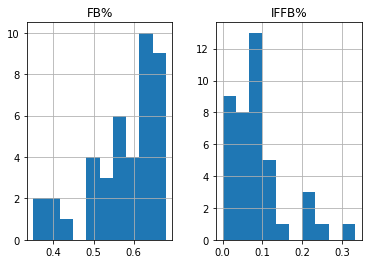

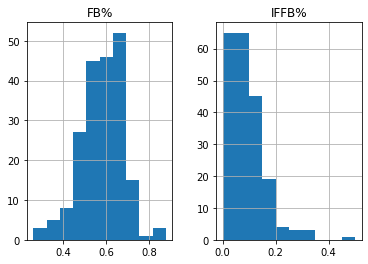

In [ ]:
mlb_19[['FB%','IFFB%']].hist()
mlb_18[['FB%','IFFB%']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e72bd9050>,
      dtype=object)

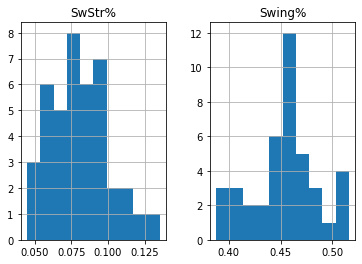

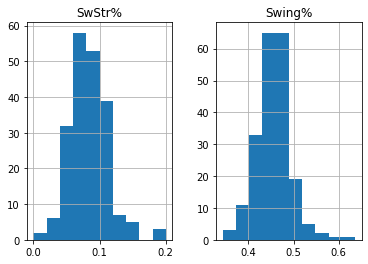

In [ ]:
# 헛스윙과 스윙 비율
mlb_19[['SwStr%','Swing%']].hist()
mlb_18[['SwStr%','Swing%']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e72f2e5d0>]],
      dtype=object)

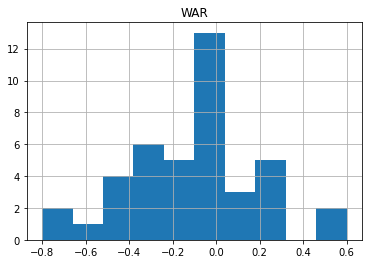

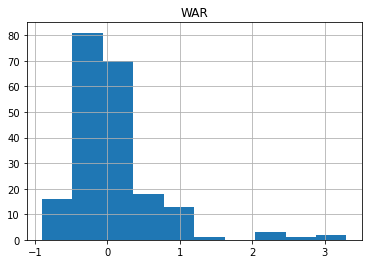

In [ ]:
# 대체선수 대비 승리기여도
mlb_19[['WAR']].hist()
mlb_18[['WAR']].hist()

* 편향 정반대

## #2. 스탯캐스트 데이터

### (1) 데이터 살펴보기

In [ ]:
a=mlb_statcast_18.shape
b=mlb_statcast_19.shape

print(a,b)

(135753, 24) (21903, 24)


In [ ]:
a=mlb_statcast_18.info()
b=b=mlb_statcast_19.info()

print(a, b)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135753 entries, 0 to 135752
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   game_date          135753 non-null  object 
 1   release_speed      135534 non-null  float64
 2   batter             135684 non-null  float64
 3   pitcher            135753 non-null  int64  
 4   events             35707 non-null   object 
 5   description        135753 non-null  object 
 6   zone               135534 non-null  float64
 7   stand              135753 non-null  object 
 8   p_throws           135753 non-null  object 
 9   bb_type            26575 non-null   object 
 10  balls              135753 non-null  int64  
 11  strikes            135753 non-null  int64  
 12  pfx_x              135534 non-null  float64
 13  pfx_z              135534 non-null  float64
 14  plate_x            135534 non-null  float64
 15  plate_z            135534 non-null  float64
 16  ax

In [ ]:
# mlb_statcast_18.head()
mlb_statcast_19.head()

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,2018-05-03,85.4,519058,518445,sac_fly,hit_into_play_score,13.0,L,L,fly_ball,1,2,-0.6303,0.2614,-0.9200,2.0320,-6.1015,22.5146,-29.0091,90.4,26.0,2305.0,Cutter,채드벨
1,2018-05-03,91.7,519058,518445,NaN,foul,12.0,L,L,NaN,1,2,0.5348,1.3339,0.4845,3.5506,6.7067,29.5849,-15.5999,72.7,14.0,2265.0,4-Seam Fastball,채드벨
2,2018-05-03,86.1,519058,518445,NaN,foul,13.0,L,L,NaN,1,2,-0.6130,0.3790,-1.4736,1.6516,-5.7169,25.0563,-27.4184,NaN,NaN,2379.0,Cutter,채드벨
3,2018-05-03,85.3,519058,518445,NaN,ball,11.0,L,L,NaN,0,2,-0.3473,0.1350,-1.5007,2.5166,-2.7315,24.9668,-30.5457,NaN,NaN,2284.0,Cutter,채드벨
4,2018-05-03,83.3,519058,518445,NaN,swinging_strike,12.0,L,L,NaN,0,1,-0.3449,0.0342,0.3519,3.5876,-3.3883,24.6765,-32.2025,NaN,NaN,2332.0,Slider,채드벨


### (2)누락값 및 이상치 확인

In [ ]:
mlb_statcast_18.apply(lambda x: pd.isna(x).sum())
# mlb_statcast_19.apply(lambda x: pd.isna(x).sum())

game_date                 0
release_speed           219
batter                   69
pitcher                   0
events               100046
description               0
zone                    219
stand                     0
p_throws                  0
bb_type              109178
balls                     0
strikes                   0
pfx_x                   219
pfx_z                   219
plate_x                 219
plate_z                 219
ax                      219
ay                      219
az                      219
launch_speed         128904
launch_angle         128903
release_spin_rate    111149
pitch_name              330
pitcher_name              0
dtype: int64

* release_speed(실수): 15개
* events(자료): 16111개
* bb_type(자료): 17574개
* launch_speed(실수): 17461개
* launch_angle(실수): 17461개
* release_spin_rate(실수): 7163개
* pitch_name(자료): 15개


In [ ]:
###################################################알아오기
mlb_statcast_18[pd.isna(mlb_statcast_18[['release_speed','zone','pfx_x','pfx_z','plate_x','plate_z','ax','ay','az']])]

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### (3) 변수 살펴보기

#### game_data(경기 날짜)

In [ ]:
#KBO
a=mlb_statcast_18.game_date.min()
b=mlb_statcast_18.game_date.max()
print(a, b)

2010-06-01 2017-10-01


In [ ]:
#MLB
a=mlb_statcast_19.game_date.min()
b=mlb_statcast_19.game_date.max()
print(a, b)

2011-07-30 2018-09-29


#### release_speed(구속)

In [ ]:
#KBO
a=mlb_statcast_18.release_speed.min()
b=mlb_statcast_18.release_speed.max()
print(a, b)

42.3 100.9


In [ ]:
#MLB
a=mlb_statcast_19.release_speed.min()
b=mlb_statcast_19.release_speed.max()
print(a, b)

42.7 99.1


#### events

In [ ]:
#KBO 해당타석의 결과(events)
mlb_statcast_18.events.unique()

array(['field_out', 'home_run', nan, 'single', 'walk', 'strikeout',
       'hit_by_pitch', 'triple', 'double', 'intent_walk', 'sac_bunt',
       'sac_fly', 'force_out', 'grounded_into_double_play', 'double_play',
       'field_error', 'fielders_choice_out', 'pickoff_caught_stealing_2b',
       'fielders_choice', 'strikeout_double_play', 'caught_stealing_2b',
       'other_out', 'catcher_interf', 'sac_fly_double_play', 'pickoff_1b',
       'pickoff_caught_stealing_home', 'run'], dtype=object)

In [ ]:
mlb_statcast_18.events.nunique()

26

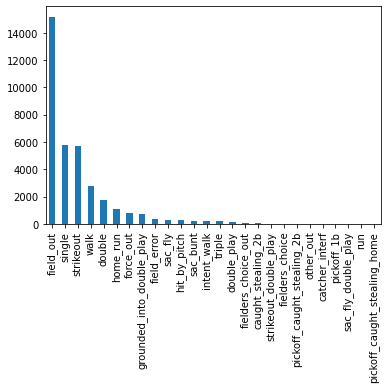

In [ ]:
mlb_statcast_18.events.value_counts().plot(kind='bar')

In [ ]:
#MLB 해당타석의 결과(events)
mlb_statcast_19.events.unique()

array(['sac_fly', nan, 'walk', 'strikeout', 'single', 'field_out',
       'double', 'home_run', 'grounded_into_double_play', 'force_out',
       'hit_by_pitch', 'caught_stealing_2b', 'strikeout_double_play',
       'fielders_choice', 'double_play', 'triple', 'field_error',
       'intent_walk', 'fielders_choice_out', 'sac_bunt', 'pickoff_1b',
       'other_out', 'sac_fly_double_play', 'caught_stealing_home'],
      dtype=object)

In [ ]:
mlb_statcast_19.events.nunique()

23

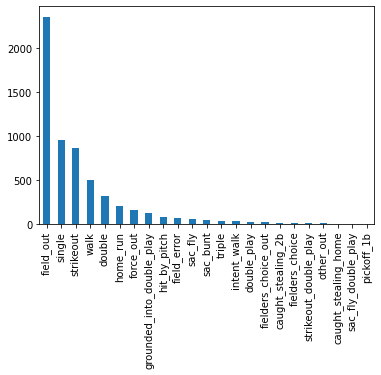

In [ ]:
mlb_statcast_19.events.value_counts().plot(kind='bar')

#### description(해당 공의 결과)

In [ ]:
#KBO 해당 공의 결과(description)
mlb_statcast_18.description.unique()

array(['hit_into_play', 'hit_into_play_score', 'foul', 'blocked_ball',
       'ball', 'foul_tip', 'hit_into_play_no_out', 'called_strike',
       'foul_bunt', 'swinging_strike', 'hit_by_pitch', 'intent_ball',
       'pitchout', 'swinging_strike_blocked', 'missed_bunt'], dtype=object)

In [ ]:
mlb_statcast_18.description.nunique()

15

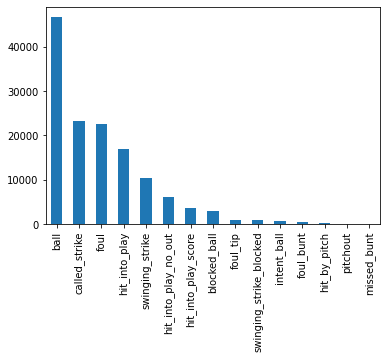

In [ ]:
mlb_statcast_18.description.value_counts().plot(kind='bar')

In [ ]:
#MLB 해당 공의 결과(description)
mlb_statcast_19.description.unique()

array(['hit_into_play_score', 'foul', 'ball', 'swinging_strike',
       'swinging_strike_blocked', 'called_strike', 'hit_into_play_no_out',
       'foul_bunt', 'hit_into_play', 'blocked_ball', 'foul_tip',
       'hit_by_pitch', 'intent_ball', 'missed_bunt', 'pitchout'],
      dtype=object)

In [ ]:
mlb_statcast_19.description.nunique()

15

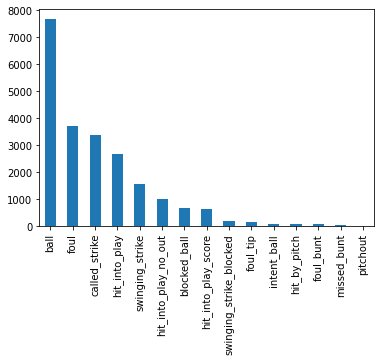

In [ ]:
mlb_statcast_19.description.value_counts().plot(kind='bar')

#### zone(공이 홈플레이트를 지날 때의 위치)

In [ ]:
mlb_statcast_18.zone.describe()
#mlb_statcast_19.zone.describe()

count    135534.000000
mean          9.080098
std           4.170178
min           1.000000
25%           5.000000
50%          11.000000
75%          13.000000
max          14.000000
Name: zone, dtype: float64

#### stand(타자의 손잡이 위치) & p_throws(투수의 손잡이)


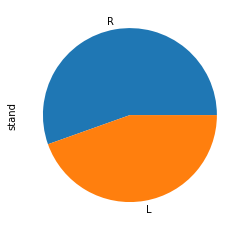

In [ ]:
mlb_statcast_18['stand'].value_counts().plot(kind='pie')

#### p_throws(투수의 손잡이)

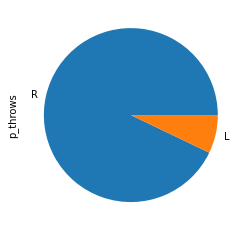

In [ ]:
mlb_statcast_19['p_throws'].value_counts().plot(kind='pie')

#### bb_type(타구의 유형)

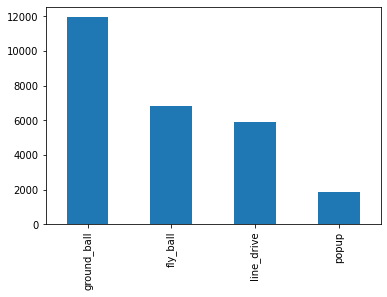

In [ ]:
mlb_statcast_18.bb_type.value_counts().plot(kind='bar')

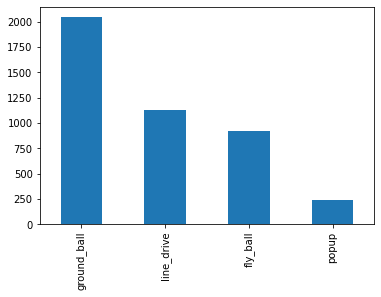

In [ ]:
mlb_statcast_19.bb_type.value_counts().plot(kind='bar')

#### pfx_x(공의 수평 움직임)

#### pfx_z(공의 수직 움직임)

#### pitch_name(구종)

In [ ]:
#KBO
mlb_statcast_18.pitch_name.unique()

array(['4-Seam Fastball', 'Changeup', '2-Seam Fastball', 'Curveball', nan,
       'Cutter', 'Intentional Ball', 'Slider', 'Pitch Out', 'Forkball',
       'Sinker', 'Unknown', 'Eephus', 'Fastball', 'Split Finger'],
      dtype=object)

In [ ]:
mlb_statcast_18.pitch_name.nunique()

14

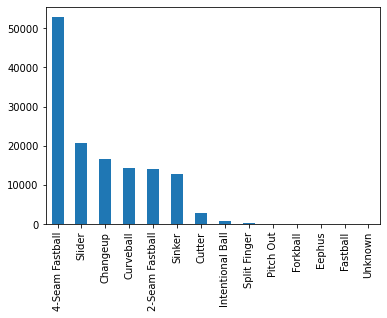

In [ ]:
mlb_statcast_18.pitch_name.value_counts().plot(kind='bar')

In [ ]:
# MLB
mlb_statcast_19.pitch_name.unique()

array(['Cutter', '4-Seam Fastball', 'Slider', 'Changeup',
       '2-Seam Fastball', 'Curveball', 'Sinker', 'Intentional Ball', nan,
       'Pitch Out', 'Eephus', 'Fastball', 'Unknown'], dtype=object)

In [ ]:
mlb_statcast_19.pitch_name.nunique()

12

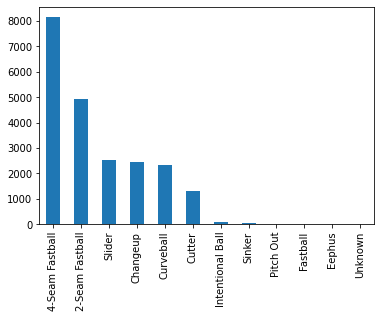

In [ ]:
mlb_statcast_19.pitch_name.value_counts().plot(kind='bar')

# < EDA 2 > 이것저것 시도

### 데이터 합치기

In [ ]:
mlb_18.head()

,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,오간도,2011.0,3.51,3.3,693.0,149.0,16.0,43.0,7.0,126.0,1.14,0.265,3.65,0.237,0.364,0.674,0.147,0.090,0.475
1,험버,2011.0,3.75,3.2,676.0,151.0,14.0,41.0,6.0,116.0,1.18,0.275,3.58,0.168,0.471,0.458,0.094,0.092,0.463
2,루카스,2012.0,3.76,2.8,827.0,185.0,13.0,78.0,1.0,140.0,1.36,0.289,3.75,0.203,0.572,0.707,0.082,0.062,0.424
3,다이아몬드,2012.0,3.54,2.2,714.0,184.0,17.0,31.0,4.0,90.0,1.24,0.292,3.94,0.210,0.534,0.597,0.040,0.068,0.467
4,듀브론트,2013.0,4.32,2.2,705.0,161.0,13.0,71.0,5.0,139.0,1.43,0.310,3.78,0.199,0.456,0.633,0.127,0.077,0.434


In [ ]:
kbo_18.head()

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
1,니퍼트,2012,두산,3.20,785,156,15,68,8,126,NaN
2,니퍼트,2013,두산,3.58,482,108,7,34,4,104,NaN
3,니퍼트,2014,두산,3.81,760,186,17,48,6,158,NaN
4,니퍼트,2015,두산,5.10,404,104,4,33,4,76,NaN


In [ ]:
#mlb_18.columns
kbo_18.columns

Index(['pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'year_born'],
      dtype='object')

In [ ]:
mlb_18['stage'] = 'mlb'
mlb_18 = mlb_18[['stage','pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP','SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%','Swing%']]

In [ ]:
mlb_18

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,mlb,오간도,2011.0,3.51,3.3,693.0,149.0,16.0,43.0,7.0,126.0,1.14,0.265,3.65,0.237,0.364,0.674,0.147,0.090,0.475
1,mlb,험버,2011.0,3.75,3.2,676.0,151.0,14.0,41.0,6.0,116.0,1.18,0.275,3.58,0.168,0.471,0.458,0.094,0.092,0.463
2,mlb,루카스,2012.0,3.76,2.8,827.0,185.0,13.0,78.0,1.0,140.0,1.36,0.289,3.75,0.203,0.572,0.707,0.082,0.062,0.424
3,mlb,다이아몬드,2012.0,3.54,2.2,714.0,184.0,17.0,31.0,4.0,90.0,1.24,0.292,3.94,0.210,0.534,0.597,0.040,0.068,0.467
4,mlb,듀브론트,2013.0,4.32,2.2,705.0,161.0,13.0,71.0,5.0,139.0,1.43,0.310,3.78,0.199,0.456,0.633,0.127,0.077,0.434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,mlb,오설리반,2015.0,6.08,-0.7,328.0,94.0,16.0,20.0,6.0,35.0,1.61,0.311,6.18,0.190,0.415,0.578,0.049,0.062,0.461
201,mlb,루카스,2013.0,5.86,-0.8,707.0,174.0,20.0,88.0,6.0,89.0,1.70,0.306,5.42,0.211,0.515,0.718,0.121,0.051,0.389
202,mlb,레나도,2016.0,9.48,-0.8,151.0,36.0,10.0,20.0,0.0,18.0,1.79,0.252,8.06,0.143,0.402,0.566,0.118,0.053,0.462
203,mlb,오간도,2015.0,3.99,-0.9,277.0,59.0,12.0,28.0,3.0,53.0,1.33,0.260,5.32,0.205,0.421,0.637,0.141,0.112,0.478


In [ ]:
kbo_18['stage'] = 'kbo'
kbo_18 = kbo_18[['stage','pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB', 'HBP','SO','year_born']]

In [ ]:
kbo_18

,stage,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,kbo,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
1,kbo,니퍼트,2012,두산,3.20,785,156,15,68,8,126,NaN
2,kbo,니퍼트,2013,두산,3.58,482,108,7,34,4,104,NaN
3,kbo,니퍼트,2014,두산,3.81,760,186,17,48,6,158,NaN
4,kbo,니퍼트,2015,두산,5.10,404,104,4,33,4,76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
100,kbo,후랭코프,2018,두산,3.74,621,118,12,55,22,134,1988년 08월 27일
101,kbo,휠러,2018,한화,5.13,459,128,12,34,10,94,NaN
102,kbo,산체스,2018,SK,4.89,632,161,26,39,7,124,1989년 11월 28일
103,kbo,윌슨,2018,LG,3.07,689,158,11,35,6,149,1989년 09월 25일


In [ ]:
kbo_mlb_18 = pd.concat([kbo_18,mlb_18])
kbo_mlb_18

,stage,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born,WAR,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,kbo,니퍼트,2011.0,두산,2.55,763.0,150.0,8.0,64.0,10.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kbo,니퍼트,2012.0,두산,3.20,785.0,156.0,15.0,68.0,8.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,kbo,니퍼트,2013.0,두산,3.58,482.0,108.0,7.0,34.0,4.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kbo,니퍼트,2014.0,두산,3.81,760.0,186.0,17.0,48.0,6.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kbo,니퍼트,2015.0,두산,5.10,404.0,104.0,4.0,33.0,4.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,mlb,오설리반,2015.0,NaN,6.08,328.0,94.0,16.0,20.0,6.0,35.0,NaN,-0.7,1.61,0.311,6.18,0.190,0.415,0.578,0.049,0.062,0.461
201,mlb,루카스,2013.0,NaN,5.86,707.0,174.0,20.0,88.0,6.0,89.0,NaN,-0.8,1.70,0.306,5.42,0.211,0.515,0.718,0.121,0.051,0.389
202,mlb,레나도,2016.0,NaN,9.48,151.0,36.0,10.0,20.0,0.0,18.0,NaN,-0.8,1.79,0.252,8.06,0.143,0.402,0.566,0.118,0.053,0.462
203,mlb,오간도,2015.0,NaN,3.99,277.0,59.0,12.0,28.0,3.0,53.0,NaN,-0.9,1.33,0.260,5.32,0.205,0.421,0.637,0.141,0.112,0.478


In [ ]:
kbo_mlb_18[kbo_mlb_18['pitcher_name'] == '니퍼트']

,stage,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born,WAR,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,kbo,니퍼트,2011.0,두산,2.55,763.0,150.0,8.0,64.0,10.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kbo,니퍼트,2012.0,두산,3.20,785.0,156.0,15.0,68.0,8.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,kbo,니퍼트,2013.0,두산,3.58,482.0,108.0,7.0,34.0,4.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kbo,니퍼트,2014.0,두산,3.81,760.0,186.0,17.0,48.0,6.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kbo,니퍼트,2015.0,두산,5.10,404.0,104.0,4.0,33.0,4.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,kbo,니퍼트,2016.0,두산,2.95,701.0,151.0,15.0,57.0,9.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,kbo,니퍼트,2017.0,두산,4.06,782.0,175.0,20.0,77.0,10.0,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,kbo,니퍼트,2018.0,KT,4.25,765.0,209.0,26.0,39.0,9.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,mlb,니퍼트,2010.0,NaN,4.29,262.0,61.0,7.0,34.0,5.0,47.0,NaN,-0.3,1.68,0.32,5.09,0.267,0.32,0.666,0.099,0.082,0.423


In [ ]:
kbo_mlb_18.groupby(['stage','pitcher_name'])['pitcher_name'].count()

stage  pitcher_name
kbo    니퍼트             8
       다이아몬드           1
       듀브론트            1
       레나도             1
       레온              1
                      ..
mlb    험버              4
       헤일              5
       헥터              5
       후랭코프            1
       휠러              1
Name: pitcher_name, Length: 122, dtype: int64

In [ ]:
mlb_statcast_18.head()

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,0,0,-0.604558,1.912833,-0.626,2.771,-6.404,26.077,-9.694,NaN,NaN,NaN,4-Seam Fastball,니퍼트
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,3,2,-0.857842,1.909967,-0.112,2.401,-10.168,28.786,-8.895,NaN,NaN,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,3,1,-0.536367,2.014600,0.272,3.052,-5.605,26.657,-7.794,NaN,NaN,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,2,1,-0.806350,2.167967,-1.193,0.632,-9.099,30.273,-6.371,NaN,NaN,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,1,1,-0.571158,1.818233,0.370,1.383,-5.846,27.290,-11.262,NaN,NaN,NaN,4-Seam Fastball,니퍼트


### 겹치는 선수

In [ ]:
## 11년도에서 18년도까지 KBO, MLB, 스텟캐스트 데이터에 모두 해당하는 선수
dup_pitcher=set(kbo_18['pitcher_name'])&set(mlb_18['pitcher_name'])&set(mlb_statcast_18['pitcher_name'])
# len(list(dup_pitcher))
print(dup_pitcher)

{'스틴슨', '클로이드', '에반', '루카스', '레나도', '피가로', '비야누에바', '니퍼트', '어센시오', '허프', '볼스테드', '웹스터', '험버', '휠러', '소사', '베렛', '맨쉽', '피어밴드', '피노', '탈보트', '산체스', '오설리반', '웨버', '토마스', '헥터', '윌슨', '오간도', '서캠프', '보우덴', '코엘로', '올슨', '이브랜드', '보니야', '후랭코프', '레일리', '레온', '헤일', '아담', '플란데', '로저스', '세든', '샘슨', '지크', '린드블럼', '울프', '마야', '팻딘', '앨버스', '해커', '코프랜드', '레이예스', '스와잭', '어윈', '티포드', '듀브론트', '아델만', '다이아몬드'}


In [ ]:
## 11년도에서 18년도까지 KBO, MLB 데이터에 모두 해당하는 선수
pitcher_kbo_mlb=set(kbo_18['pitcher_name'])&set(mlb_18['pitcher_name'])
# print(pitcher_kbo_mlb)
len(list(pitcher_kbo_mlb))

59

In [ ]:
## 11년도에서 18년도까지 KBO, 스텟캐스트 데이터에 모두 해당하는 선수
pitcher_kbo_stat=set(kbo_18['pitcher_name'])&set(mlb_statcast_18['pitcher_name'])
print(pitcher_kbo_stat)
# len(list(pitcher_kbo_stat))

{'스틴슨', '클로이드', '에반', '루카스', '레나도', '피가로', '비야누에바', '니퍼트', '어센시오', '허프', '볼스테드', '웹스터', '험버', '휠러', '마리몬', '소사', '베렛', '맨쉽', '피어밴드', '피노', '탈보트', '산체스', '오설리반', '웨버', '토마스', '헥터', '윌슨', '오간도', '서캠프', '보우덴', '코엘로', '올슨', '이브랜드', '레일리', '보니야', '후랭코프', '레온', '헤일', '아담', '밴덴헐크', '세든', '플란데', '로저스', '샘슨', '브리검', '마야', '린드블럼', '울프', '팻딘', '지크', '앨버스', '해커', '코프랜드', '레이예스', '스와잭', '티포드', '어윈', '듀브론트', '아델만', '다이아몬드'}


In [ ]:
## 11년도에서 18년도까지 MLB, 스텟캐스트 데이터에 모두 해당하는 선수
pitcher_mlb_stat=set(mlb_18['pitcher_name'])&set(mlb_statcast_18['pitcher_name'])
# print(pitcher_mlb_stat)
len(list(pitcher_mlb_stat))

57

In [ ]:
# 3개의 데이터에 모두 해당되는 선수들의 데이터
pitcher3 = kbo_mlb_18[kbo_mlb_18['pitcher_name'].isin(['어윈', '스틴슨', '후랭코프', '어센시오', '탈보트', '린드블럼', '산체스', '보니야', '로저스', '샘슨', '스와잭', '울프', '에반', '험버', '오설리반', '레나도', '오간도', '팻딘', '맨쉽', '코엘로', '피가로', '듀브론트', '올슨', '웹스터', '볼스테드', '지크', '피노', '아담', '레온', '레일리', '코프랜드', '베렛', '보우덴', '루카스', '허프', '플란데', '비야누에바', '클로이드', '레이예스', '아델만', '마야', '휠러', '윌슨', '티포드', '헤일', '웨버', '서캠프', '다이아몬드', '헥터', '피어밴드', '세든', '토마스', '니퍼트', '앨버스', '해커', '이브랜드', '소사'])]
pitcher3_st = mlb_statcast_18[mlb_statcast_18['pitcher_name'].isin(['어윈', '스틴슨', '후랭코프', '어센시오', '탈보트', '린드블럼', '산체스', '보니야', '로저스', '샘슨', '스와잭', '울프', '에반', '험버', '오설리반', '레나도', '오간도', '팻딘', '맨쉽', '코엘로', '피가로', '듀브론트', '올슨', '웹스터', '볼스테드', '지크', '피노', '아담', '레온', '레일리', '코프랜드', '베렛', '보우덴', '루카스', '허프', '플란데', '비야누에바', '클로이드', '레이예스', '아델만', '마야', '휠러', '윌슨', '티포드', '헤일', '웨버', '서캠프', '다이아몬드', '헥터', '피어밴드', '세든', '토마스', '니퍼트', '앨버스', '해커', '이브랜드', '소사'])]
pitcher3

,stage,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born,WAR,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,kbo,니퍼트,2011.0,두산,2.55,763.0,150.0,8.0,64.0,10.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kbo,니퍼트,2012.0,두산,3.20,785.0,156.0,15.0,68.0,8.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,kbo,니퍼트,2013.0,두산,3.58,482.0,108.0,7.0,34.0,4.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kbo,니퍼트,2014.0,두산,3.81,760.0,186.0,17.0,48.0,6.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kbo,니퍼트,2015.0,두산,5.10,404.0,104.0,4.0,33.0,4.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,mlb,오설리반,2015.0,NaN,6.08,328.0,94.0,16.0,20.0,6.0,35.0,NaN,-0.7,1.61,0.311,6.18,0.190,0.415,0.578,0.049,0.062,0.461
201,mlb,루카스,2013.0,NaN,5.86,707.0,174.0,20.0,88.0,6.0,89.0,NaN,-0.8,1.70,0.306,5.42,0.211,0.515,0.718,0.121,0.051,0.389
202,mlb,레나도,2016.0,NaN,9.48,151.0,36.0,10.0,20.0,0.0,18.0,NaN,-0.8,1.79,0.252,8.06,0.143,0.402,0.566,0.118,0.053,0.462
203,mlb,오간도,2015.0,NaN,3.99,277.0,59.0,12.0,28.0,3.0,53.0,NaN,-0.9,1.33,0.260,5.32,0.205,0.421,0.637,0.141,0.112,0.478


## 투수와 타자 선수 별 특징

목적: 투수가 어떤 타자를 만났을 때 전략이 변하는지 궁금해서
* 경기상황에 영향을 받지 않는 칼럼들만 보기
* 특정한 투수-타자 만난 행
* 날짜 별로 묶어서
* 이변량 그래프 그려보기?

* ********* 어떤 경기 상황에 따라 구속이나 구종 등이 바뀌는지(or 결과를 보고 취약한지)
* **************pitcher_name이랑 pitcher정리하기

경기에 영향 안 받는 변수: game_date(경기날짜)
* 투수관련: pitcher(투수아이디), p_throws(투수의 손잡이), pitch_name(구종), release_speed(구속), axayaz(공의 가속도성분 xyz), release_spin_rate(투수가 던진 공의 회전율)
* 타자관련: batter(타자아이디), stand(타자손잡이), bb_type(타구유형), launch_speed(타구의 속도), launch_angle(타구의 발사각도)
* ***근데 구속도 경기상황에 영향받을 것 같은데..

### (1) 투수 별 특징

In [ ]:
# 추려진 투수들 인원 수
print(pitcher3_st.pitcher_name.nunique())

57


In [ ]:
pitcher3_st.head()

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,0,0,-0.604558,1.912833,-0.626,2.771,-6.404,26.077,-9.694,NaN,NaN,NaN,4-Seam Fastball,니퍼트
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,3,2,-0.857842,1.909967,-0.112,2.401,-10.168,28.786,-8.895,NaN,NaN,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,3,1,-0.536367,2.014600,0.272,3.052,-5.605,26.657,-7.794,NaN,NaN,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,2,1,-0.806350,2.167967,-1.193,0.632,-9.099,30.273,-6.371,NaN,NaN,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,1,1,-0.571158,1.818233,0.370,1.383,-5.846,27.290,-11.262,NaN,NaN,NaN,4-Seam Fastball,니퍼트


In [ ]:
pitcher3_st_drop=pitcher3_st.drop(['batter','events', 'balls', 'strikes', 'description', 'zone', 'stand', 'bb_type', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z','launch_speed', 'launch_angle',], axis=1)
pitcher3_st_drop.head()

,game_date,release_speed,pitcher,p_throws,ax,ay,az,release_spin_rate,pitch_name,pitcher_name
0,2010-10-09,93.0,430962,R,-6.404,26.077,-9.694,NaN,4-Seam Fastball,니퍼트
1,2010-10-09,95.2,430962,R,-10.168,28.786,-8.895,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,430962,R,-5.605,26.657,-7.794,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,430962,R,-9.099,30.273,-6.371,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,430962,R,-5.846,27.290,-11.262,NaN,4-Seam Fastball,니퍼트


In [ ]:
  # 선수 구종 정리표
  pitch_freq = pitcher3_st_drop.groupby(['pitcher_name', 'pitch_name'])['pitch_name'].count()
  pitch_freq = pd.DataFrame(pitch_freq)
  pitch_freq.columns = ['count']
  pitch_freq = pitch_freq.reset_index(drop=False, inplace=False)
  pitch_freq

,pitcher_name,pitch_name,count
0,니퍼트,2-Seam Fastball,26
1,니퍼트,4-Seam Fastball,384
2,니퍼트,Changeup,81
3,니퍼트,Curveball,82
4,니퍼트,Cutter,6
...,...,...,...
358,후랭코프,Slider,12
359,휠러,2-Seam Fastball,16
360,휠러,4-Seam Fastball,17
361,휠러,Changeup,11


In [ ]:
def pitcher_feature(df):

  #연도-날짜 열 생성
  df['year_month'] = df['game_date'].str.slice(stop=7) 

  speed = pd.DataFrame()
  hand = pd.DataFrame()
  pitch = pd.DataFrame()

    ## 선수별 시간에 따른 구속 변화
  speed_mean = df.groupby(['pitcher_name', 'year_month'])['release_speed'].mean()
  speed_mean = pd.DataFrame(speed_mean)
  speed_mean = speed_mean.reset_index(drop=False, inplace=False)

  speed = pd.concat([speed,speed_mean],axis=0)

    ## 투수의 손잡이 빈도
  hand_freq = df.groupby(['pitcher_name', 'p_throws'])['p_throws'].count()
  hand_freq = pd.DataFrame(hand_freq)
  hand_freq.columns = ['count']
  hand_freq = hand_freq.reset_index(drop=False, inplace=False)

  hand = pd.concat([hand,hand_freq],axis=0)

   ## 투수의 구종 빈도
  pitch_freq = df.groupby(['pitcher_name', 'pitch_name'])['pitch_name'].count()
  pitch_freq = pd.DataFrame(pitch_freq)
  pitch_freq.columns = ['count']
  pitch_freq = pitch_freq.reset_index(drop=False, inplace=False)

  pitch = pd.concat([pitch,pitch_freq],axis=0)

  return speed, hand, pitch

In [ ]:
character = pitcher_feature(pitcher3_st_drop)
character

(    pitcher_name year_month  release_speed
 0            니퍼트    2010-06      90.078175
 1            니퍼트    2010-07      88.528261
 2            니퍼트    2010-09      89.571505
 3            니퍼트    2010-10      87.358621
 4          다이아몬드    2011-07      84.874444
 ..           ...        ...            ...
 639           헥터    2015-04      90.587560
 640           헥터    2015-05      91.495041
 641           헥터    2015-06      91.330380
 642         후랭코프    2017-06      88.056757
 643           휠러    2017-05      85.501786
 
 [644 rows x 3 columns],    pitcher_name p_throws  count
 0           니퍼트        R    590
 1         다이아몬드        L   5386
 2          듀브론트        L   9042
 3           레나도        R   1552
 4            레온        R    426
 5          레이예스        L   2368
 6           레일리        L    652
 7           로저스        R   6910
 8           루카스        R   7174
 9          린드블럼        R   2341
 10           마야        R    962
 11           맨쉽        R   3081
 12           베렛 

In [ ]:
character = pitcher_feature(pitcher3_st_drop[pitcher3_st_drop['pitcher_name']=='니퍼트'])
character

(  pitcher_name year_month  release_speed
 0          니퍼트    2010-06      90.078175
 1          니퍼트    2010-07      88.528261
 2          니퍼트    2010-09      89.571505
 3          니퍼트    2010-10      87.358621,   pitcher_name p_throws  count
 0          니퍼트        R    590,   pitcher_name        pitch_name  count
 0          니퍼트   2-Seam Fastball     26
 1          니퍼트   4-Seam Fastball    384
 2          니퍼트          Changeup     81
 3          니퍼트         Curveball     82
 4          니퍼트            Cutter      6
 5          니퍼트  Intentional Ball      4
 6          니퍼트         Pitch Out      1
 7          니퍼트            Slider      4)

### (2) 타자 별 특징

In [ ]:
# 추려진 투수들이 만난 타자 인원수
print(pitcher3_st.batter.nunique())

1343


In [ ]:
batter3 = pitcher3_st.drop(['release_speed', 'pitcher', 'events', 'description', 'zone', 'p_throws', 'balls', 'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az', 'release_spin_rate', 'pitch_name', 'pitcher_name'], axis=1)
batter3

,game_date,batter,stand,bb_type,launch_speed,launch_angle
0,2010-10-09,425834.0,R,popup,NaN,NaN
1,2010-10-09,150289.0,L,fly_ball,NaN,NaN
2,2010-10-09,150289.0,L,NaN,NaN,NaN
3,2010-10-09,150289.0,L,NaN,NaN,NaN
4,2010-10-09,150289.0,L,NaN,NaN,NaN
...,...,...,...,...,...,...
135748,2017-08-24,518735.0,L,NaN,NaN,NaN
135749,2017-08-24,457759.0,R,popup,76.1,62.0
135750,2017-08-24,457759.0,R,NaN,NaN,NaN
135751,2017-08-24,457759.0,R,NaN,NaN,NaN


### (3) 동일한 날짜와 투수-타자

In [ ]:
pitcher3_st

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,0,0,-0.604558,1.912833,-0.6260,2.7710,-6.4040,26.0770,-9.6940,NaN,NaN,NaN,4-Seam Fastball,니퍼트
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,3,2,-0.857842,1.909967,-0.1120,2.4010,-10.1680,28.7860,-8.8950,NaN,NaN,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,3,1,-0.536367,2.014600,0.2720,3.0520,-5.6050,26.6570,-7.7940,NaN,NaN,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,2,1,-0.806350,2.167967,-1.1930,0.6320,-9.0990,30.2730,-6.3710,NaN,NaN,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,1,1,-0.571158,1.818233,0.3700,1.3830,-5.8460,27.2900,-11.2620,NaN,NaN,NaN,4-Seam Fastball,니퍼트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135748,2017-08-24,96.4,518735.0,605795,NaN,ball,11.0,L,R,NaN,0,0,-1.177500,1.691600,-1.1062,2.9915,-16.0426,30.7298,-8.6690,NaN,NaN,2322.0,4-Seam Fastball,산체스
135749,2017-08-24,91.6,457759.0,605795,field_out,hit_into_play,2.0,R,R,popup,2,1,0.117300,0.841900,-0.2363,2.9159,1.0209,24.7374,-21.7554,76.1,62.0,2307.0,Cutter,산체스
135750,2017-08-24,91.9,457759.0,605795,NaN,called_strike,8.0,R,R,NaN,2,0,-0.103000,0.877900,-0.2430,1.7737,-1.7590,25.3770,-20.8001,NaN,NaN,2418.0,Cutter,산체스
135751,2017-08-24,95.6,457759.0,605795,NaN,ball,11.0,R,R,NaN,1,0,-1.096800,1.228600,-0.3190,3.6256,-15.6116,28.6716,-15.3398,NaN,NaN,2283.0,4-Seam Fastball,산체스


In [ ]:
fight = pitcher3_st[(pitcher3_st['pitcher_name'] == '니퍼트') & (pitcher3_st['batter'] == 150289.0)] 
fight

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,3,2,-0.857842,1.909967,-0.112,2.401,-10.168,28.786,-8.895,NaN,NaN,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,3,1,-0.536367,2.014600,0.272,3.052,-5.605,26.657,-7.794,NaN,NaN,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,2,1,-0.806350,2.167967,-1.193,0.632,-9.099,30.273,-6.371,NaN,NaN,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,1,1,-0.571158,1.818233,0.370,1.383,-5.846,27.290,-11.262,NaN,NaN,NaN,4-Seam Fastball,니퍼트
5,2010-10-09,80.8,150289.0,430962,NaN,foul_tip,13.0,L,R,NaN,1,0,-1.197408,1.391100,-1.233,2.059,-10.897,18.539,-20.286,NaN,NaN,NaN,Changeup,니퍼트
6,2010-10-09,92.0,150289.0,430962,NaN,ball,9.0,L,R,NaN,0,0,-0.610125,1.947233,0.510,1.722,-6.251,27.786,-10.031,NaN,NaN,NaN,4-Seam Fastball,니퍼트
557,2010-06-06,94.0,150289.0,430962,single,hit_into_play_no_out,3.0,L,R,fly_ball,0,0,-0.441733,1.275000,0.716,3.158,-4.345,21.828,-17.529,NaN,NaN,NaN,4-Seam Fastball,니퍼트


## 변수 간의 연관성 pairplot

In [ ]:
print(mlb_18.columns)
print(kbo_18.columns)
print(kbo_mlb_18.columns)
print(mlb_statcast_18.columns)

Index(['stage', 'pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB',
       'HBP', 'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%',
       'SwStr%', 'Swing%'],
      dtype='object')
Index(['stage', 'pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB',
       'HBP', 'SO', 'year_born'],
      dtype='object')
Index(['stage', 'pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB',
       'HBP', 'SO', 'year_born', 'WAR', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%',
       'FB%', 'IFFB%', 'SwStr%', 'Swing%'],
      dtype='object')
Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')


In [ ]:
mlb_18

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,mlb,오간도,2011.0,3.51,3.3,693.0,149.0,16.0,43.0,7.0,126.0,1.14,0.265,3.65,0.237,0.364,0.674,0.147,0.090,0.475
1,mlb,험버,2011.0,3.75,3.2,676.0,151.0,14.0,41.0,6.0,116.0,1.18,0.275,3.58,0.168,0.471,0.458,0.094,0.092,0.463
2,mlb,루카스,2012.0,3.76,2.8,827.0,185.0,13.0,78.0,1.0,140.0,1.36,0.289,3.75,0.203,0.572,0.707,0.082,0.062,0.424
3,mlb,다이아몬드,2012.0,3.54,2.2,714.0,184.0,17.0,31.0,4.0,90.0,1.24,0.292,3.94,0.210,0.534,0.597,0.040,0.068,0.467
4,mlb,듀브론트,2013.0,4.32,2.2,705.0,161.0,13.0,71.0,5.0,139.0,1.43,0.310,3.78,0.199,0.456,0.633,0.127,0.077,0.434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,mlb,오설리반,2015.0,6.08,-0.7,328.0,94.0,16.0,20.0,6.0,35.0,1.61,0.311,6.18,0.190,0.415,0.578,0.049,0.062,0.461
201,mlb,루카스,2013.0,5.86,-0.8,707.0,174.0,20.0,88.0,6.0,89.0,1.70,0.306,5.42,0.211,0.515,0.718,0.121,0.051,0.389
202,mlb,레나도,2016.0,9.48,-0.8,151.0,36.0,10.0,20.0,0.0,18.0,1.79,0.252,8.06,0.143,0.402,0.566,0.118,0.053,0.462
203,mlb,오간도,2015.0,3.99,-0.9,277.0,59.0,12.0,28.0,3.0,53.0,1.33,0.260,5.32,0.205,0.421,0.637,0.141,0.112,0.478


In [ ]:
kbo_mlb_18_XXX=mlb_statcast_18.drop(['game_date', 'batter', 'pitcher', 'events','description', 'stand', 'p_throws', 'bb_type', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az', 'pitch_name','pitcher_name'], axis=1)
kbo_18_XXX = kbo_18.drop(['stage', 'pitcher_name', 'year', 'team', 'year_born'], axis=1)
mlb_18_XXX = mlb_18.drop(['stage', 'pitcher_name', 'year'], axis=1)

In [ ]:
XXX = pd.concat([kbo_mlb_18_XXX, kbo_18_XXX], axis=1)
XXX = pd.concat([XXX, mlb_18_XXX], axis=1)

In [ ]:
XXX.columns

Index(['release_speed', 'zone', 'balls', 'strikes', 'launch_speed',
       'launch_angle', 'release_spin_rate', 'ERA', 'TBF', 'H', 'HR', 'BB',
       'HBP', 'SO', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP', 'SO', 'WHIP',
       'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%', 'Swing%'],
      dtype='object')

In [ ]:
XXX.columns = ['release_speed', 'zone', 'balls', 'strikes', 'launch_speed', 'launch_angle', 'release_spin_rate', 'ERA_k', 'TBF_k', 'H_k', 'HR_k', 'BB_k', 'HBP_k', 'SO_k', 'ERA_m', 'WAR_m', 'TBF_m', 'H_m', 'HR_m', 'BB_m', 'HBP_m', 'SO_m', 'WHIP_m', 'BABIP_m', 'FIP_m', 'LD%_m', 'GB%_m', 'FB%_m', 'IFFB%_m', 'SwStr%_m', 'Swing%_m']

In [ ]:
# fig = sns.pairplot(XXX)

In [ ]:
# ax = sns.heatmap('')
# plt.title('Heatmap of Flight by seaborn', fontsize=20)
# plt.show() 

# < EDA 3 > DBSCAN 군집화 

- 밀도기반 군집화 알고리즘
- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘
- 데이터 분포가 기하학적으로 복잡한 데이토 세트에도 효과적인 군집화 가능
- 원모양과 외부 원모양(도넛 모양)형태의 데이터 세트 군집화에 적합

## #1. 전처리

### (1) 투수이름 고유번호로 바꾸기

In [ ]:
kbo_data

,Unnamed: 0,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP,year
0,0,1,윤석민,KIA,2.45,27,17,5,1,0,0.773,172 1/3,137,10,44,6,178,53,47,1.05,2011
1,1,2,니퍼트,두산,2.55,29,15,6,0,0,0.714,187,150,8,64,10,150,61,53,1.14,2011
2,2,3,김선우,두산,3.13,28,16,7,1,0,0.696,175 2/3,188,12,35,6,89,68,61,1.27,2011
3,3,4,장원준,롯데,3.14,29,15,6,0,0,0.714,180 2/3,195,7,62,9,129,72,63,1.42,2011
4,4,5,윤성환,삼성,3.54,24,14,5,0,0,0.737,137 1/3,151,8,30,3,83,62,54,1.32,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,162,21,보니야,삼성,5.30,29,7,10,0,0,0.412,168,193,23,63,12,151,111,99,1.52,2018
163,163,22,금민철,KT,5.41,29,8,12,0,0,0.400,156 1/3,212,19,68,7,79,104,94,1.79,2018
164,164,23,임찬규,LG,5.77,29,11,11,1,0,0.500,146 2/3,195,23,47,13,125,104,94,1.65,2018
165,165,24,차우찬,LG,6.09,29,12,10,0,0,0.545,170,177,27,79,10,136,119,115,1.51,2018


In [ ]:
kbo_18['year_month'] = kbo_18['year_born'].str.slice(stop=4)
kbo_18_db = kbo_18.drop('year_born', axis=1)
kbo_18_db

,stage,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_month
0,kbo,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
1,kbo,니퍼트,2012,두산,3.20,785,156,15,68,8,126,NaN
2,kbo,니퍼트,2013,두산,3.58,482,108,7,34,4,104,NaN
3,kbo,니퍼트,2014,두산,3.81,760,186,17,48,6,158,NaN
4,kbo,니퍼트,2015,두산,5.10,404,104,4,33,4,76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
100,kbo,후랭코프,2018,두산,3.74,621,118,12,55,22,134,1988
101,kbo,휠러,2018,한화,5.13,459,128,12,34,10,94,NaN
102,kbo,산체스,2018,SK,4.89,632,161,26,39,7,124,1989
103,kbo,윌슨,2018,LG,3.07,689,158,11,35,6,149,1989


#### pitcher: pitcher_name으로 딕셔너리 형태로 변환

In [ ]:
## pitcher: pitcher_name으로 딕셔너리 형태로 변환
## pitcher칼럼을 인덱스로 바꾸고 딕셔너리 형태로 변환하기
switch = mlb_statcast_18.drop(['game_date', 'release_speed', 'batter', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate',
       'pitch_name'], axis=1)
switch=switch.set_index('pitcher')
switch.index.name=''
switch

,pitcher_name
,
430962,니퍼트
430962,니퍼트
430962,니퍼트
430962,니퍼트
430962,니퍼트
...,...
605795,산체스
605795,산체스
605795,산체스


In [ ]:
# switch.to_dict('index')
# switch

#################실패^^

In [ ]:
## pitcher: pitcher_name으로 딕셔너리 형태로 변환
## pitcher칼럼 데이터를 칼럼으로 바꾸고 딕셔너리 형태로 변환하기
switch = mlb_statcast_18.drop(['game_date', 'release_speed', 'batter', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate',
       'pitch_name'], axis=1)
switch=switch.drop_duplicates()
switch = switch.transpose()
switch

,0,590,1483,2020,3134,4057,4964,12138,13691,14608,17361,20442,23974,33595,40116,42081,42215,44055,46423,50957,51672,54013,60539,66083,66335,72378,72952,73826,75117,84159,92915,99825,100822,101194,103092,104054,105770,106078,106932,107358,107776,109328,109651,110809,114004,119390,120984,121506,123514,125938,126590,127561,127813,127850,130781,132621,132797,133234,135489,135545
pitcher,430962,434629,445193,445968,446003,448693,449173,451628,452027,452676,453249,453307,453646,456051,456071,456387,457425,457456,457711,457796,458676,458690,458950,459345,461872,462995,464400,464416,467094,468396,469134,474668,476206,476601,493337,501870,502010,502139,504186,516970,519168,519403,534737,534947,539438,543031,543809,543903,548337,548384,570810,571577,571676,571735,572102,572947,573244,592869,605528,605795
pitcher_name,니퍼트,세든,코엘로,이브랜드,어센시오,울프,루카스,피가로,앨버스,탈보트,맨쉽,허프,비야누에바,헥터,플란데,피어밴드,에반,레이예스,오설리반,올슨,린드블럼,볼스테드,험버,해커,스와잭,밴덴헐크,소사,피노,듀브론트,오간도,로저스,서캠프,토마스,보우덴,마야,티포드,브리검,스틴슨,레온,마리몬,레나도,웨버,팻딘,아델만,다이아몬드,클로이드,지크,웹스터,베렛,레일리,보니야,코프랜드,후랭코프,헤일,샘슨,어윈,아담,윌슨,휠러,산체스


In [ ]:
switch=switch.rename(columns=switch.iloc[1]).drop('pitcher_name')
switch

,니퍼트,세든,코엘로,이브랜드,어센시오,울프,루카스,피가로,앨버스,탈보트,맨쉽,허프,비야누에바,헥터,플란데,피어밴드,에반,레이예스,오설리반,올슨,린드블럼,볼스테드,험버,해커,스와잭,밴덴헐크,소사,피노,듀브론트,오간도,로저스,서캠프,토마스,보우덴,마야,티포드,브리검,스틴슨,레온,마리몬,레나도,웨버,팻딘,아델만,다이아몬드,클로이드,지크,웹스터,베렛,레일리,보니야,코프랜드,후랭코프,헤일,샘슨,어윈,아담,윌슨,휠러,산체스
pitcher,430962,434629,445193,445968,446003,448693,449173,451628,452027,452676,453249,453307,453646,456051,456071,456387,457425,457456,457711,457796,458676,458690,458950,459345,461872,462995,464400,464416,467094,468396,469134,474668,476206,476601,493337,501870,502010,502139,504186,516970,519168,519403,534737,534947,539438,543031,543809,543903,548337,548384,570810,571577,571676,571735,572102,572947,573244,592869,605528,605795


In [ ]:
pitch_dict=switch.to_dict('list')
print(type(pitch_dict))
print(pitch_dict)

<class 'dict'>
{'니퍼트': [430962], '세든': [434629], '코엘로': [445193], '이브랜드': [445968], '어센시오': [446003], '울프': [448693], '루카스': [449173], '피가로': [451628], '앨버스': [452027], '탈보트': [452676], '맨쉽': [453249], '허프': [453307], '비야누에바': [453646], '헥터': [456051], '플란데': [456071], '피어밴드': [456387], '에반': [457425], '레이예스': [457456], '오설리반': [457711], '올슨': [457796], '린드블럼': [458676], '볼스테드': [458690], '험버': [458950], '해커': [459345], '스와잭': [461872], '밴덴헐크': [462995], '소사': [464400], '피노': [464416], '듀브론트': [467094], '오간도': [468396], '로저스': [469134], '서캠프': [474668], '토마스': [476206], '보우덴': [476601], '마야': [493337], '티포드': [501870], '브리검': [502010], '스틴슨': [502139], '레온': [504186], '마리몬': [516970], '레나도': [519168], '웨버': [519403], '팻딘': [534737], '아델만': [534947], '다이아몬드': [539438], '클로이드': [543031], '지크': [543809], '웹스터': [543903], '베렛': [548337], '레일리': [548384], '보니야': [570810], '코프랜드': [571577], '후랭코프': [571676], '헤일': [571735], '샘슨': [572102], '어윈': [572947], '아담': [573244], '윌슨': [592869], '휠러'

#### pitcher_name을 지정된 pitcher로 바꾸기

In [ ]:
pitcher3

,stage,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born,WAR,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,kbo,니퍼트,2011.0,두산,2.55,763.0,150.0,8.0,64.0,10.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kbo,니퍼트,2012.0,두산,3.20,785.0,156.0,15.0,68.0,8.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,kbo,니퍼트,2013.0,두산,3.58,482.0,108.0,7.0,34.0,4.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kbo,니퍼트,2014.0,두산,3.81,760.0,186.0,17.0,48.0,6.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kbo,니퍼트,2015.0,두산,5.10,404.0,104.0,4.0,33.0,4.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,mlb,오설리반,2015.0,NaN,6.08,328.0,94.0,16.0,20.0,6.0,35.0,NaN,-0.7,1.61,0.311,6.18,0.190,0.415,0.578,0.049,0.062,0.461
201,mlb,루카스,2013.0,NaN,5.86,707.0,174.0,20.0,88.0,6.0,89.0,NaN,-0.8,1.70,0.306,5.42,0.211,0.515,0.718,0.121,0.051,0.389
202,mlb,레나도,2016.0,NaN,9.48,151.0,36.0,10.0,20.0,0.0,18.0,NaN,-0.8,1.79,0.252,8.06,0.143,0.402,0.566,0.118,0.053,0.462
203,mlb,오간도,2015.0,NaN,3.99,277.0,59.0,12.0,28.0,3.0,53.0,NaN,-0.9,1.33,0.260,5.32,0.205,0.421,0.637,0.141,0.112,0.478


In [ ]:
pitcher_replace = pitcher3.replace({'pitcher_name':pitch_dict})
pitcher_replace
### 우하하 됐다

,stage,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born,WAR,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,kbo,430962,2011.0,두산,2.55,763.0,150.0,8.0,64.0,10.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kbo,430962,2012.0,두산,3.20,785.0,156.0,15.0,68.0,8.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,kbo,430962,2013.0,두산,3.58,482.0,108.0,7.0,34.0,4.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kbo,430962,2014.0,두산,3.81,760.0,186.0,17.0,48.0,6.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kbo,430962,2015.0,두산,5.10,404.0,104.0,4.0,33.0,4.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,mlb,457711,2015.0,NaN,6.08,328.0,94.0,16.0,20.0,6.0,35.0,NaN,-0.7,1.61,0.311,6.18,0.190,0.415,0.578,0.049,0.062,0.461
201,mlb,449173,2013.0,NaN,5.86,707.0,174.0,20.0,88.0,6.0,89.0,NaN,-0.8,1.70,0.306,5.42,0.211,0.515,0.718,0.121,0.051,0.389
202,mlb,519168,2016.0,NaN,9.48,151.0,36.0,10.0,20.0,0.0,18.0,NaN,-0.8,1.79,0.252,8.06,0.143,0.402,0.566,0.118,0.053,0.462
203,mlb,468396,2015.0,NaN,3.99,277.0,59.0,12.0,28.0,3.0,53.0,NaN,-0.9,1.33,0.260,5.32,0.205,0.421,0.637,0.141,0.112,0.478


### (2) 데이터 선택

In [ ]:
## 11년도에서 18년도까지 KBO, 스텟캐스트 데이터에 모두 해당하는 선수
pitcher_kbo_stat=set(kbo_18['pitcher_name'])&set(mlb_statcast_18['pitcher_name'])
print(pitcher_kbo_stat)
# len(list(pitcher_kbo_stat))

{'스틴슨', '클로이드', '에반', '루카스', '레나도', '피가로', '비야누에바', '니퍼트', '어센시오', '허프', '볼스테드', '웹스터', '험버', '휠러', '마리몬', '소사', '베렛', '맨쉽', '피어밴드', '피노', '탈보트', '산체스', '오설리반', '웨버', '토마스', '헥터', '윌슨', '오간도', '서캠프', '보우덴', '코엘로', '올슨', '이브랜드', '레일리', '보니야', '후랭코프', '레온', '헤일', '아담', '밴덴헐크', '세든', '플란데', '로저스', '샘슨', '브리검', '마야', '린드블럼', '울프', '팻딘', '지크', '앨버스', '해커', '코프랜드', '레이예스', '스와잭', '티포드', '어윈', '듀브론트', '아델만', '다이아몬드'}


In [ ]:
pitcher3_kbo18 = kbo_18[kbo_18['pitcher_name'].isin(['브리검', '해커', '코엘로', '앨버스', '아델만', '헥터', '레나도', '토마스', '보니야', '탈보트', '볼스테드', '루카스', '웹스터', '클로이드', '허프', '듀브론트', '험버', '레이예스', '올슨', '후랭코프', '헤일', '아담', '플란데', '보우덴', '어윈', '마리몬', '레일리', '이브랜드', '어센시오', '맨쉽', '샘슨', '니퍼트', '스와잭', '티포드', '피어밴드', '팻딘', '윌슨', '지크', '다이아몬드', '밴덴헐크', '휠러', '산체스', '서캠프', '오간도', '마야', '웨버', '오설리반', '에반', '스틴슨', '세든', '로저스', '레온', '소사', '베렛', '울프', '비야누에바', '피가로', '린드블럼', '코프랜드', '피노'])]

In [ ]:
pitcher_replace = pitcher3_kbo18.replace({'pitcher_name':pitch_dict})
pitcher_replace

,stage,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born,year_month
0,kbo,430962,2011,두산,2.55,763,150,8,64,10,150,NaN,NaN
1,kbo,430962,2012,두산,3.20,785,156,15,68,8,126,NaN,NaN
2,kbo,430962,2013,두산,3.58,482,108,7,34,4,104,NaN,NaN
3,kbo,430962,2014,두산,3.81,760,186,17,48,6,158,NaN,NaN
4,kbo,430962,2015,두산,5.10,404,104,4,33,4,76,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,kbo,571676,2018,두산,3.74,621,118,12,55,22,134,1988년 08월 27일,1988
101,kbo,605528,2018,한화,5.13,459,128,12,34,10,94,NaN,NaN
102,kbo,605795,2018,SK,4.89,632,161,26,39,7,124,1989년 11월 28일,1989
103,kbo,592869,2018,LG,3.07,689,158,11,35,6,149,1989년 09월 25일,1989


In [ ]:
pitcher_replace['year_month'] = pitcher_replace['year_born'].str.slice(stop=4)
kbo_18_db = pitcher_replace.drop(['year_born','team','year_month', 'stage'], axis=1)
kbo_18_db = kbo_18_db.set_index('pitcher_name')
kbo_18_db

,year,ERA,TBF,H,HR,BB,HBP,SO
pitcher_name,,,,,,,,
430962,2011,2.55,763,150,8,64,10,150
430962,2012,3.20,785,156,15,68,8,126
430962,2013,3.58,482,108,7,34,4,104
430962,2014,3.81,760,186,17,48,6,158
430962,2015,5.10,404,104,4,33,4,76
...,...,...,...,...,...,...,...,...
571676,2018,3.74,621,118,12,55,22,134
605528,2018,5.13,459,128,12,34,10,94
605795,2018,4.89,632,161,26,39,7,124


### (3) 연도별로 묶기

In [ ]:
kbo_18_db11 = kbo_18_db[kbo_18_db['year']==2011]
kbo_18_db12 = kbo_18_db[kbo_18_db['year']==2012]
kbo_18_db13 = kbo_18_db[kbo_18_db['year']==2013]
kbo_18_db14 = kbo_18_db[kbo_18_db['year']==2014]
kbo_18_db15 = kbo_18_db[kbo_18_db['year']==2015]
kbo_18_db16 = kbo_18_db[kbo_18_db['year']==2016]
kbo_18_db17 = kbo_18_db[kbo_18_db['year']==2017]
kbo_18_db18 = kbo_18_db[kbo_18_db['year']==2018]

In [ ]:
print(kbo_18_db11.shape[0])
print(kbo_18_db12.shape[0])
print(kbo_18_db13.shape[0])
print(kbo_18_db14.shape[0])
print(kbo_18_db15.shape[0])
print(kbo_18_db16.shape[0])
print(kbo_18_db17.shape[0])
print(kbo_18_db18.shape[0])

1
3
9
13
18
20
17
20


## #2. 군집화 모델

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=2, metric='euclidean')
dbscan_label = dbscan.fit_predict(kbo_18_db18)
kbo_18_db18['dbscan_cluster']=dbscan_label
kbo_18_db18

,year,ERA,TBF,H,HR,BB,HBP,SO,dbscan_cluster
pitcher_name,,,,,,,,,
430962,2018,4.25,765,209,26,39,9,165,-1
467094,2018,4.92,629,162,13,62,8,109,-1
548384,2018,4.74,775,180,24,54,18,178,-1
469134,2018,3.80,345,89,7,16,5,65,-1
458676,2018,2.88,681,142,16,38,8,157,-1
548337,2018,5.28,698,178,24,59,9,144,-1
570810,2018,5.30,752,193,23,63,12,151,-1
502010,2018,3.84,829,188,19,50,19,175,-1
572102,2018,4.68,703,144,17,79,5,195,-1


In [ ]:
# result=kbo_18_db.groupby(['dbscan_cluster']).count()
# result

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2, random_state=0)
# pca_trans = pca.fit_transform(kbo_18_db)
# kbo_18_db['ftr1'] = pca_trans[:, 0]
# kbo_18_db['ftr2'] = pca_trans[:, 1]

# visualize_cluster_plot(dbscan, kbo_18_db, 'dbscan_label', iscenter=False)

## #3. 군집 평가

In [ ]:
# from sklearn.preprocessing import scale
# from sklearn.metrics import silhouette_samples, silhouette_score
# # 
# %matplotlib inline

# **[문제 정의] 어떤 용병을 스카웃을 해야 하는가? 어떤 선수들을 영입해야 팀에 도움이 될까?**

1.   가설 1: 팀 성향에 맞는 선수를 영입해야 한다.
2.   가설 2: 



# < 가설 1 > 팀 성향에 맞는 선수를 영입해야 한다.


**선수별 특성**
*   [kbo_18]투수 별 KBO에 선발된 시기 정리

*   [kbo_18 & mlb_18]KBO 입성 이전 mlb 활동이력 걸러내기

*   [kbo_18 & mlb_18]KBO 입성 이전 mlb 활동이력을 바탕으로 '선수' 별 성향 및 특징 분석

*   [kbo_18 & mlb_18]KBO 입성 이후 필드변동 3가지로 나눠서 분석(적응하면서 변화한 성향 위주)
      * 3개 경우 각각 대표선수 뽑아서 감잡기
      1.   다시 MLB로 돌아간 경우 -> 몇년 후에 돌아갔는지 / 왜 돌아갔는지(?) / KBO입성이후 달라진 특징이 있는지
      2.   KBO에서만 활동한 경우 -> 몇년동안 활동을 했는지 / KBO 영입 이전 MLB 활동 특징 vs KBO 영입 이후 특징
      3.   MLB와 KBO 모두 활동한 경우(연도 교차) -> 몇년동안 KBO에서 활동을 지속했는지 / MLB에서 몇년동안 활동하고 다시 KBO로 돌아왔는지 / KBO 영입 이전 MLB 활동 특징 vs KBO 영입 이후 특징 vs mlb로 돌아간 후의 특징 / (KBO에서만 특정하게 쓰는 투구가 있다던지)

**팀별 특성**
*   [kbo_18] '팀' 별로 어떤 선수를 선호하는지 분석 -> 주력전략, 성향 파악근거(ex. 구속이 ~이상의 투수를 선호한다.)
*   [kbo_18] 한 팀에서 짧은 기간(2년) 활동했던 선수들을 분석해서, 팀 반대성향으로 정의 (비약주의)



##### (사용할 데이터)

In [ ]:
## 11년도에서 18년도까지 KBO, MLB 데이터에 모두 해당하는 선수
pitcher_kbo_mlb=set(kbo_18['pitcher_name'])&set(mlb_18['pitcher_name'])
print(pitcher_kbo_mlb)

{'스틴슨', '클로이드', '에반', '루카스', '레나도', '피가로', '비야누에바', '니퍼트', '어센시오', '허프', '볼스테드', '웹스터', '험버', '휠러', '소사', '베렛', '리즈', '맨쉽', '피어밴드', '피노', '탈보트', '산체스', '오설리반', '웨버', '토마스', '헥터', '윌슨', '오간도', '서캠프', '보우덴', '코엘로', '올슨', '이브랜드', '보니야', '후랭코프', '레일리', '레온', '헤일', '아담', '카스티요', '플란데', '로저스', '세든', '샘슨', '지크', '린드블럼', '울프', '마야', '팻딘', '앨버스', '해커', '코프랜드', '레이예스', '스와잭', '어윈', '티포드', '듀브론트', '아델만', '다이아몬드'}


In [ ]:
mlb_kbo_18 = mlb_18[mlb_18['pitcher_name'].isin(['피가로', '로저스', '허프', '앨버스', '오설리반', '서캠프', '카스티요', '레이예스', '보우덴', '니퍼트', '샘슨', '레일리', '울프', '웹스터', '듀브론트', '에반', '어윈', '레온', '클로이드', '아담', '스와잭', '볼스테드', '웨버', '이브랜드', '리즈', '험버', '스틴슨', '피노', '플란데', '헥터', '탈보트', '마야', '다이아몬드', '린드블럼', '지크', '코프랜드', '어센시오', '오간도', '후랭코프', '보니야', '소사', '헤일', '맨쉽', '베렛', '아델만', '팻딘', '토마스', '레나도', '윌슨', '코엘로', '세든', '해커', '피어밴드', '티포드', '비야누에바', '휠러', '올슨', '루카스', '산체스'])]
kbo_mlb_18 = kbo_18[kbo_18['pitcher_name'].isin(['피가로', '로저스', '허프', '앨버스', '오설리반', '서캠프', '카스티요', '레이예스', '보우덴', '니퍼트', '샘슨', '레일리', '울프', '웹스터', '듀브론트', '에반', '어윈', '레온', '클로이드', '아담', '스와잭', '볼스테드', '웨버', '이브랜드', '리즈', '험버', '스틴슨', '피노', '플란데', '헥터', '탈보트', '마야', '다이아몬드', '린드블럼', '지크', '코프랜드', '어센시오', '오간도', '후랭코프', '보니야', '소사', '헤일', '맨쉽', '베렛', '아델만', '팻딘', '토마스', '레나도', '윌슨', '코엘로', '세든', '해커', '피어밴드', '티포드', '비야누에바', '휠러', '올슨', '루카스', '산체스'])]
mlb_kbo_18
# kbo_mlb_18

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,mlb,오간도,2011.0,3.51,3.3,693.0,149.0,16.0,43.0,7.0,126.0,1.14,0.265,3.65,0.237,0.364,0.674,0.147,0.090,0.475
1,mlb,험버,2011.0,3.75,3.2,676.0,151.0,14.0,41.0,6.0,116.0,1.18,0.275,3.58,0.168,0.471,0.458,0.094,0.092,0.463
2,mlb,루카스,2012.0,3.76,2.8,827.0,185.0,13.0,78.0,1.0,140.0,1.36,0.289,3.75,0.203,0.572,0.707,0.082,0.062,0.424
3,mlb,다이아몬드,2012.0,3.54,2.2,714.0,184.0,17.0,31.0,4.0,90.0,1.24,0.292,3.94,0.210,0.534,0.597,0.040,0.068,0.467
4,mlb,듀브론트,2013.0,4.32,2.2,705.0,161.0,13.0,71.0,5.0,139.0,1.43,0.310,3.78,0.199,0.456,0.633,0.127,0.077,0.434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,mlb,오설리반,2015.0,6.08,-0.7,328.0,94.0,16.0,20.0,6.0,35.0,1.61,0.311,6.18,0.190,0.415,0.578,0.049,0.062,0.461
201,mlb,루카스,2013.0,5.86,-0.8,707.0,174.0,20.0,88.0,6.0,89.0,1.70,0.306,5.42,0.211,0.515,0.718,0.121,0.051,0.389
202,mlb,레나도,2016.0,9.48,-0.8,151.0,36.0,10.0,20.0,0.0,18.0,1.79,0.252,8.06,0.143,0.402,0.566,0.118,0.053,0.462
203,mlb,오간도,2015.0,3.99,-0.9,277.0,59.0,12.0,28.0,3.0,53.0,1.33,0.260,5.32,0.205,0.421,0.637,0.141,0.112,0.478


## #1. 투수 별 KBO에 선발된 시기 정리

In [ ]:
time_to_recruit = kbo_mlb_18.groupby('pitcher_name')['year'].min()
time_to_recruit.sort_values(inplace=True)
time_to_recruit = pd.DataFrame(time_to_recruit).reset_index()
time_to_recruit # 총 59명

,pitcher_name,year
0,니퍼트,2011
1,리즈,2011
2,탈보트,2012
3,소사,2012
4,세든,2013
5,해커,2013
6,아담,2013
7,레이예스,2013
8,올슨,2013
9,이브랜드,2013


In [ ]:
time_to_recruit.groupby('year')['year'].count()

year
2011     2
2012     2
2013     6
2014     8
2015    12
2016    12
2017     7
2018    10
Name: year, dtype: int64

## #2. KBO 영입 이전 MLB 활동 데이터 수집

In [ ]:
## 2011년도에 영입된 사람들은 KBO에 적응된 특징만 파악 / KBO 영입시기가 2012년인 선수는 2011년 MLB데이터 밖에 못씀 
## 위의 말 사용자정의함수 만들기 -> KBO 영입시기에 따른 영업시기 이전의 MLB 데이터 가져오기(선수별 변수저장함수)

In [ ]:
def before_KBO(df):
  mlb_career = pd.DataFrame()

  for i in range(len(time_to_recruit)):
    pitcher_i = time_to_recruit['pitcher_name'][i]
    pitcher_i = df[df['pitcher_name']==pitcher_i]
    kbo_year = time_to_recruit['year'][i]

    if kbo_year == 2011:
      career = pitcher_i[pitcher_i['year'] < 2011]
      mlb_career = pd.concat([mlb_career, career], axis=0)

    elif kbo_year == 2012:
      career = pitcher_i[pitcher_i['year'] < 2012]
      mlb_career = pd.concat([mlb_career, career], axis=0)

    elif kbo_year == 2013:
      career = pitcher_i[pitcher_i['year'] < 2013]
      mlb_career = pd.concat([mlb_career, career], axis=0)

    elif kbo_year == 2014:
      career = pitcher_i[pitcher_i['year'] < 2014]
      mlb_career = pd.concat([mlb_career, career], axis=0)

    elif kbo_year == 2015:
      career = pitcher_i[pitcher_i['year'] < 2015]
      mlb_career = pd.concat([mlb_career, career], axis=0)

    elif kbo_year == 2016:
      career = pitcher_i[pitcher_i['year'] < 2016]
      mlb_career = pd.concat([mlb_career, career], axis=0)

    elif kbo_year == 2017:
      career = pitcher_i[pitcher_i['year'] < 2017]
      mlb_career = pd.concat([mlb_career, career], axis=0)
    
    else:
      career = pitcher_i[pitcher_i['year'] < 2018]
      mlb_career = pd.concat([mlb_career, career], axis=0)

  return mlb_career

In [ ]:
mlb_before_kbo = before_KBO(mlb_kbo_18)
mlb_before_kbo

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
163,mlb,니퍼트,2010.0,4.29,-0.3,262.0,61.0,7.0,34.0,5.0,47.0,1.68,0.320,5.09,0.267,0.320,0.666,0.099,0.082,0.423
7,mlb,탈보트,2010.0,4.41,1.2,696.0,169.0,13.0,69.0,8.0,88.0,1.49,0.301,4.48,0.169,0.478,0.495,0.070,0.060,0.428
138,mlb,탈보트,2011.0,6.64,-0.2,299.0,90.0,10.0,28.0,3.0,36.0,1.85,0.360,5.40,0.246,0.425,0.448,0.120,0.049,0.446
55,mlb,소사,2011.0,5.23,0.2,231.0,54.0,7.0,23.0,3.0,38.0,1.44,0.294,4.77,0.179,0.444,0.615,0.148,0.090,0.454
48,mlb,세든,2012.0,3.67,0.3,147.0,35.0,2.0,13.0,0.0,18.0,1.40,0.289,3.94,0.250,0.414,0.585,0.154,0.095,0.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,mlb,듀브론트,2015.0,5.50,0.4,328.0,87.0,10.0,26.0,1.0,56.0,1.50,0.328,4.45,0.189,0.471,0.556,0.099,0.097,0.452
56,mlb,듀브론트,2010.0,4.32,0.2,113.0,27.0,3.0,10.0,1.0,23.0,1.48,0.316,4.12,0.103,0.474,0.717,0.091,0.069,0.432
121,mlb,듀브론트,2011.0,6.10,-0.1,47.0,12.0,1.0,8.0,0.0,6.0,1.94,0.344,5.44,0.281,0.438,0.674,0.111,0.056,0.382
164,mlb,듀브론트,2014.0,5.54,-0.3,364.0,91.0,12.0,33.0,2.0,51.0,1.56,0.297,5.13,0.225,0.380,0.578,0.112,0.070,0.429


In [ ]:
## for문 확인하기 
# 앨버스는 2014년도에 KBO 최초 입성
mlb_kbo_18[mlb_kbo_18['pitcher_name']=='앨버스']

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
19,mlb,앨버스,2013.0,4.05,0.8,249.0,64.0,6.0,7.0,2.0,25.0,1.18,0.278,3.96,0.196,0.435,0.670,0.117,0.067,0.487
29,mlb,앨버스,2017.0,3.51,0.5,178.0,43.0,6.0,10.0,2.0,37.0,1.29,0.301,4.13,0.266,0.336,0.647,0.098,0.080,0.521
143,mlb,앨버스,2015.0,3.37,-0.2,11.0,1.0,1.0,2.0,0.0,1.0,1.12,0.000,9.51,0.250,0.500,0.371,0.000,0.029,0.343
149,mlb,앨버스,2016.0,5.82,-0.2,85.0,27.0,5.0,6.0,0.0,16.0,1.94,0.379,6.15,0.222,0.476,0.663,0.000,0.064,0.457


In [ ]:
# 결과값은 2014년도 이전 데이터만 출력되어야 함
a = mlb_before_kbo[mlb_before_kbo['pitcher_name']=='앨버스']
# a.drop_duplicates(inplace=True)
a 

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
19,mlb,앨버스,2013.0,4.05,0.8,249.0,64.0,6.0,7.0,2.0,25.0,1.18,0.278,3.96,0.196,0.435,0.67,0.117,0.067,0.487


## #3. KBO 입성 이전 mlb 활동을 바탕으로 '선수' 별 성향 및 특징 분석


*   statcast에서 겹치는 선수 정보 추가
*   각 변수들 어떻게 사용할건지 정하기



In [ ]:
# (예시)                 ERA   WAR   BABIP
#        니퍼트 2010년 
#               2011년

### (1) statcast에서 겹치는 선수 정보 추가

In [ ]:
pitcher_add = set(mlb_before_kbo['pitcher_name'])&set(mlb_statcast_18['pitcher_name'])
print(pitcher_add)

{'스틴슨', '클로이드', '에반', '루카스', '레나도', '피가로', '비야누에바', '니퍼트', '어센시오', '허프', '볼스테드', '웹스터', '험버', '휠러', '소사', '베렛', '피어밴드', '맨쉽', '피노', '탈보트', '산체스', '오설리반', '웨버', '토마스', '헥터', '윌슨', '오간도', '레일리', '서캠프', '올슨', '코엘로', '이브랜드', '보우덴', '후랭코프', '보니야', '아담', '레온', '헤일', '세든', '로저스', '플란데', '샘슨', '마야', '린드블럼', '울프', '지크', '팻딘', '앨버스', '해커', '코프랜드', '레이예스', '스와잭', '티포드', '어윈', '듀브론트', '아델만', '다이아몬드'}


In [ ]:
add_statcast = mlb_statcast_18[mlb_statcast_18['pitcher_name'].isin(['린드블럼', '듀브론트', '탈보트', '코프랜드', '피어밴드', '서캠프', '피노', '베렛', '보우덴', '비야누에바', '오간도', '볼스테드', '보니야', '마야', '아담', '앨버스', '레온', '올슨', '루카스', '산체스', '세든', '로저스', '해커', '허프', '레일리', '이브랜드', '아델만', '스와잭', '플란데', '지크', '소사', '어센시오', '레나도', '토마스', '팻딘', '후랭코프', '티포드', '윌슨', '에반', '샘슨', '험버', '코엘로', '어윈', '웹스터', '다이아몬드', '맨쉽', '헤일', '니퍼트', '울프', '클로이드', '스틴슨', '헥터', '오설리반', '피가로', '웨버', '휠러', '레이예스'])]
add_statcast['year'] = add_statcast['game_date'].str.slice(stop=4)
add_statcast = add_statcast.astype({'year': int})
add_statcast#.info()

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name,year
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,0,0,-0.604558,1.912833,-0.6260,2.7710,-6.4040,26.0770,-9.6940,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,3,2,-0.857842,1.909967,-0.1120,2.4010,-10.1680,28.7860,-8.8950,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,3,1,-0.536367,2.014600,0.2720,3.0520,-5.6050,26.6570,-7.7940,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,2,1,-0.806350,2.167967,-1.1930,0.6320,-9.0990,30.2730,-6.3710,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,1,1,-0.571158,1.818233,0.3700,1.3830,-5.8460,27.2900,-11.2620,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135748,2017-08-24,96.4,518735.0,605795,NaN,ball,11.0,L,R,NaN,0,0,-1.177500,1.691600,-1.1062,2.9915,-16.0426,30.7298,-8.6690,NaN,NaN,2322.0,4-Seam Fastball,산체스,2017
135749,2017-08-24,91.6,457759.0,605795,field_out,hit_into_play,2.0,R,R,popup,2,1,0.117300,0.841900,-0.2363,2.9159,1.0209,24.7374,-21.7554,76.1,62.0,2307.0,Cutter,산체스,2017
135750,2017-08-24,91.9,457759.0,605795,NaN,called_strike,8.0,R,R,NaN,2,0,-0.103000,0.877900,-0.2430,1.7737,-1.7590,25.3770,-20.8001,NaN,NaN,2418.0,Cutter,산체스,2017
135751,2017-08-24,95.6,457759.0,605795,NaN,ball,11.0,R,R,NaN,1,0,-1.096800,1.228600,-0.3190,3.6256,-15.6116,28.6716,-15.3398,NaN,NaN,2283.0,4-Seam Fastball,산체스,2017


In [ ]:
# KBO입성 이전 데이터만 걸러내기
statcast_before_kbo = before_KBO(add_statcast)
statcast_before_kbo

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name,year
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,0,0,-0.604558,1.912833,-0.6260,2.7710,-6.4040,26.0770,-9.6940,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,3,2,-0.857842,1.909967,-0.1120,2.4010,-10.1680,28.7860,-8.8950,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,3,1,-0.536367,2.014600,0.2720,3.0520,-5.6050,26.6570,-7.7940,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,2,1,-0.806350,2.167967,-1.1930,0.6320,-9.0990,30.2730,-6.3710,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,1,1,-0.571158,1.818233,0.3700,1.3830,-5.8460,27.2900,-11.2620,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135540,2017-05-30,87.1,435263.0,605528,NaN,foul,9.0,L,L,NaN,2,0,1.103200,1.956500,0.6085,1.6170,13.1378,26.3400,-9.7809,103.1,8.0,1775.0,2-Seam Fastball,휠러,2017
135541,2017-05-30,87.6,435263.0,605528,NaN,ball,12.0,L,L,NaN,1,0,1.054700,1.671700,1.2078,2.7419,12.5235,26.0720,-13.1565,NaN,NaN,1816.0,2-Seam Fastball,휠러,2017
135542,2017-05-30,80.9,435263.0,605528,NaN,ball,14.0,L,L,NaN,0,0,-0.065100,0.699800,1.1872,2.3193,0.2261,23.5738,-25.2906,NaN,NaN,2015.0,Slider,휠러,2017
135543,2017-05-30,82.2,136860.0,605528,field_out,hit_into_play,8.0,R,L,line_drive,0,1,-0.083800,0.884200,0.1445,1.4057,0.5061,23.9623,-22.8065,95.3,18.0,1956.0,Slider,휠러,2017


### (2) 각 변수마다 선수의 특성 파악할 방법 찾기

In [ ]:
# 선수별, 연도 별, KBO기점
# 리그별 상황에 따라 달라짐!
## 군집화, 데이터 분포 세분화: ERA, BABIP, FIP |release_speed, release_spin_rate, launch_speed(타), launch_angle(타)	
## 문자열 데이터: pitcher_name, year | game_date, batter(타), pitcher,	events,	description, stand(타),	p_throws,	bb_type(타), pitch_name,	pitcher_name
## 단순 카운트: TBF, H//HR/BB/HBP/SO | balls,	strikes
## 그외:  LD% / GB%	/ FB% / IFFB% / SwStr% / Swing% | zone, pfx_x,	pfx_z,	plate_x	plate_z,	ax,	ay,	az

#### a. 평가지표가 있는 경우

*   mlb_before_kbo: WAR, WHIP
*   statcast_before_kbo: X


##### #* WAR 평가지표

In [ ]:
mlb_before_kbo

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
163,mlb,니퍼트,2010.0,4.29,-0.3,262.0,61.0,7.0,34.0,5.0,47.0,1.68,0.320,5.09,0.267,0.320,0.666,0.099,0.082,0.423
7,mlb,탈보트,2010.0,4.41,1.2,696.0,169.0,13.0,69.0,8.0,88.0,1.49,0.301,4.48,0.169,0.478,0.495,0.070,0.060,0.428
138,mlb,탈보트,2011.0,6.64,-0.2,299.0,90.0,10.0,28.0,3.0,36.0,1.85,0.360,5.40,0.246,0.425,0.448,0.120,0.049,0.446
55,mlb,소사,2011.0,5.23,0.2,231.0,54.0,7.0,23.0,3.0,38.0,1.44,0.294,4.77,0.179,0.444,0.615,0.148,0.090,0.454
48,mlb,세든,2012.0,3.67,0.3,147.0,35.0,2.0,13.0,0.0,18.0,1.40,0.289,3.94,0.250,0.414,0.585,0.154,0.095,0.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,mlb,듀브론트,2015.0,5.50,0.4,328.0,87.0,10.0,26.0,1.0,56.0,1.50,0.328,4.45,0.189,0.471,0.556,0.099,0.097,0.452
56,mlb,듀브론트,2010.0,4.32,0.2,113.0,27.0,3.0,10.0,1.0,23.0,1.48,0.316,4.12,0.103,0.474,0.717,0.091,0.069,0.432
121,mlb,듀브론트,2011.0,6.10,-0.1,47.0,12.0,1.0,8.0,0.0,6.0,1.94,0.344,5.44,0.281,0.438,0.674,0.111,0.056,0.382
164,mlb,듀브론트,2014.0,5.54,-0.3,364.0,91.0,12.0,33.0,2.0,51.0,1.56,0.297,5.13,0.225,0.380,0.578,0.112,0.070,0.429


In [ ]:
war = pd.DataFrame()
war['WAR'] = mlb_before_kbo['WAR'].astype(str)
war['pitcher_name'] = mlb_before_kbo['pitcher_name']
war['year'] = mlb_before_kbo['year']
# war.reset_index(inplace=True)
  
reset = mlb_before_kbo.reset_index() 

for i in range(len(reset)):
    war_i = reset['WAR'][i]
#   pitcher_i = mlb_before_kbo['pitcher_name'][i]
#   year_i = mlb_before_kbo['year'][i]
    
    if war_i < 1:
      war_i = str(war_i)
      war['WAR'].replace(war_i, 'scrub', inplace=True)

    elif (war_i >= 1) and (war_i < 2):
      war_i = str(war_i)
      war['WAR'].replace(war_i, 'role_player', inplace=True)

    elif (war_i >= 2) and (war_i < 3):
      war_i = str(war_i)
      war['WAR'].replace(war_i, 'solid_stater', inplace=True)

    elif (war_i >= 3) and (war_i < 4):
      war_i = str(war_i)
      war['WAR'].replace(war_i, 'good_player', inplace=True)

    elif (war_i >= 4) and (war_i < 5):
      war_i = str(war_i)
      war['WAR'].replace(war_i, 'all_star', inplace=True)

    elif (war_i >= 5) and (war_i < 6):
      war_i = str(war_i)
      war['WAR'].replace(war_i, 'Superstar', inplace=True)
    
    else:
      war_i = str(war_i)
      war['WAR'].replace(war_i, 'MVP', inplace=True)


In [ ]:
war

,WAR,pitcher_name,year
163,scrub,니퍼트,2010.0
7,role_player,탈보트,2010.0
138,scrub,탈보트,2011.0
55,scrub,소사,2011.0
48,scrub,세든,2012.0
...,...,...,...
35,scrub,듀브론트,2015.0
56,scrub,듀브론트,2010.0
121,scrub,듀브론트,2011.0
164,scrub,듀브론트,2014.0


In [ ]:
war.groupby(['WAR'])['WAR'].count()

WAR
good_player       2
role_player       7
scrub           156
solid_stater      3
Name: WAR, dtype: int64

##### #* WHIP 평가지표

In [ ]:
mlb_before_kbo

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
163,mlb,니퍼트,2010.0,4.29,-0.3,262.0,61.0,7.0,34.0,5.0,47.0,1.68,0.320,5.09,0.267,0.320,0.666,0.099,0.082,0.423
7,mlb,탈보트,2010.0,4.41,1.2,696.0,169.0,13.0,69.0,8.0,88.0,1.49,0.301,4.48,0.169,0.478,0.495,0.070,0.060,0.428
138,mlb,탈보트,2011.0,6.64,-0.2,299.0,90.0,10.0,28.0,3.0,36.0,1.85,0.360,5.40,0.246,0.425,0.448,0.120,0.049,0.446
55,mlb,소사,2011.0,5.23,0.2,231.0,54.0,7.0,23.0,3.0,38.0,1.44,0.294,4.77,0.179,0.444,0.615,0.148,0.090,0.454
48,mlb,세든,2012.0,3.67,0.3,147.0,35.0,2.0,13.0,0.0,18.0,1.40,0.289,3.94,0.250,0.414,0.585,0.154,0.095,0.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,mlb,듀브론트,2015.0,5.50,0.4,328.0,87.0,10.0,26.0,1.0,56.0,1.50,0.328,4.45,0.189,0.471,0.556,0.099,0.097,0.452
56,mlb,듀브론트,2010.0,4.32,0.2,113.0,27.0,3.0,10.0,1.0,23.0,1.48,0.316,4.12,0.103,0.474,0.717,0.091,0.069,0.432
121,mlb,듀브론트,2011.0,6.10,-0.1,47.0,12.0,1.0,8.0,0.0,6.0,1.94,0.344,5.44,0.281,0.438,0.674,0.111,0.056,0.382
164,mlb,듀브론트,2014.0,5.54,-0.3,364.0,91.0,12.0,33.0,2.0,51.0,1.56,0.297,5.13,0.225,0.380,0.578,0.112,0.070,0.429


In [ ]:
whip = pd.DataFrame()
whip['WHIP'] = mlb_before_kbo['WHIP'].astype(str)
whip['pitcher_name'] = mlb_before_kbo['pitcher_name']
whip['year'] = mlb_before_kbo['year']
# whip.reset_index(inplace=True)
  
reset = mlb_before_kbo.reset_index() 

for i in range(len(reset)):
    whip_i = reset['WHIP'][i]
#   pitcher_i = mlb_before_kbo['pitcher_name'][i]
#   year_i = mlb_before_kbo['year'][i]
    
    if whip_i <= 1.00:
      whip_i = str(whip_i)
      whip['WHIP'].replace(whip_i, 'excellent', inplace=True)

    elif (whip_i > 1.00) and (whip_i <= 1.10):
      whip_i = str(whip_i)
      whip['WHIP'].replace(whip_i, 'great', inplace=True)

    elif (whip_i > 1.10) and (whip_i <= 1.25):
      whip_i = str(whip_i)
      whip['WHIP'].replace(whip_i, 'above_average', inplace=True)

    elif (whip_i > 1.25) and (whip_i <= 1.32):
      whip_i = str(whip_i)
      whip['WHIP'].replace(whip_i, 'average', inplace=True)

    elif (whip_i > 1.32) and (whip_i <= 1.40):
      whip_i = str(whip_i)
      whip['WHIP'].replace(whip_i, 'below_average', inplace=True)

    elif (whip_i > 1.40) and (whip_i <= 1.50):
      whip_i = str(whip_i)
      whip['WHIP'].replace(whip_i, 'poor', inplace=True)
    
    else:
      whip_i = str(whip_i)
      whip['WHIP'].replace(whip_i, 'awful', inplace=True)


In [ ]:
whip

,WHIP,pitcher_name,year
163,awful,니퍼트,2010.0
7,poor,탈보트,2010.0
138,awful,탈보트,2011.0
55,poor,소사,2011.0
48,below_average,세든,2012.0
...,...,...,...
35,poor,듀브론트,2015.0
56,poor,듀브론트,2010.0
121,awful,듀브론트,2011.0
164,awful,듀브론트,2014.0


In [ ]:
whip.groupby(['WHIP'])['WHIP'].count()

WHIP
above_average    20
average           7
awful            77
below_average    24
excellent         3
great             4
poor             33
Name: WHIP, dtype: int64

##### #* ERA+ 평가지표

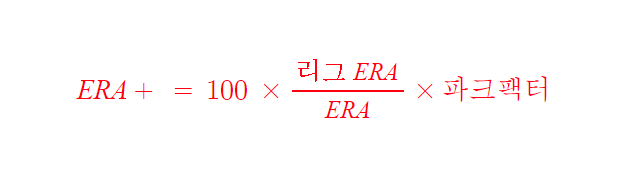

In [ ]:
# *KBO*에서는 2015년~2019년까지 5년간 리그 평균자책점이 4.82
# 이에 따라 규정 이닝을 넘기는 선발 투수 기준으로 평균자책점 4.5 이하면 웬만한 팀에서 3선발이 가능한 준수한 투수로 평가되며, 
# 3.5 이하면 팀내 에이스급 투수, 
# 3.0 이하면 리그를 지배하는 수준의 투수로 평가한다.

In [ ]:
# nl_era / park_factor 크롤링
# 조정 평균자책점 평가지표 사용자정의함수

In [ ]:
# ## 파크팩터
# KBO: http://www.statiz.co.kr/stadium.php?opt=0&sopt=2018&te=
# MLB: https://www.espn.com/mlb/stats/parkfactor/_/year/2019

In [ ]:
# era_plus = 100 * nl_era/era * park_factor

In [ ]:
# nl_era 크롤링
nl_era = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/68346_KBO_foreign_pitcher_data/nl_era.csv')
nl_era

,year,pitcher_name,ERA,team
0,2011,Clayton Kershaw,2.28,LAD
1,2011,Roy Halladay,2.35,PHI
2,2011,Cliff Lee,2.40,PHI
3,2011,Ryan Vogelsong,2.71,SF
4,2011,Tim Lincecum,2.74,SF
...,...,...,...,...
328,2019,Robbie Ray,4.34,ARI
329,2019,Merrill Kelly,4.42,ARI
330,2019,Joe Musgrove,4.44,PIT
331,2019,Jon Lester,4.46,CHC


#### b. 평가지표가 없는 경우
* 상대적 역량평가 방법
  1.   군집화로 상대적 역량평가
  2.   데이터 분포 기반 세분화

* 해당되는 변수
  * mlb_before_kbo: ERA, BABIP, FIP
     * ERA는 낮을수록 우수
     * BABIP 높을수록 우수
     * FIP 높을수록 우수
  * statcast_before_kbo: release_speed, release_spin_rate



##### (사용할 데이터)

In [ ]:
babip = mlb_before_kbo['BABIP'] #투수는 BABIP가 낮을수록 잘함
fip = mlb_before_kbo['FIP'] #
era_babip_fip = mlb_before_kbo[['pitcher_name', 'year', 'ERA', 'BABIP', 'FIP']]
era_war_whip_babip_fip = mlb_before_kbo[['ERA', 'WAR', 'WHIP', 'BABIP', 'FIP']]
mlb_before_kbo.head()

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
163,mlb,니퍼트,2010.0,4.29,-0.3,262.0,61.0,7.0,34.0,5.0,47.0,1.68,0.320,5.09,0.267,0.320,0.666,0.099,0.082,0.423
7,mlb,탈보트,2010.0,4.41,1.2,696.0,169.0,13.0,69.0,8.0,88.0,1.49,0.301,4.48,0.169,0.478,0.495,0.070,0.060,0.428
138,mlb,탈보트,2011.0,6.64,-0.2,299.0,90.0,10.0,28.0,3.0,36.0,1.85,0.360,5.40,0.246,0.425,0.448,0.120,0.049,0.446
55,mlb,소사,2011.0,5.23,0.2,231.0,54.0,7.0,23.0,3.0,38.0,1.44,0.294,4.77,0.179,0.444,0.615,0.148,0.090,0.454
48,mlb,세든,2012.0,3.67,0.3,147.0,35.0,2.0,13.0,0.0,18.0,1.40,0.289,3.94,0.250,0.414,0.585,0.154,0.095,0.467


In [ ]:
release_speed = statcast_before_kbo['release_speed']
release_spin_rate = statcast_before_kbo['release_spin_rate']
statcast_before_kbo.head()

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name,year
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,0,0,-0.604558,1.912833,-0.626,2.771,-6.404,26.077,-9.694,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,3,2,-0.857842,1.909967,-0.112,2.401,-10.168,28.786,-8.895,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,3,1,-0.536367,2.014600,0.272,3.052,-5.605,26.657,-7.794,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,2,1,-0.806350,2.167967,-1.193,0.632,-9.099,30.273,-6.371,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,1,1,-0.571158,1.818233,0.370,1.383,-5.846,27.290,-11.262,NaN,NaN,NaN,4-Seam Fastball,니퍼트,2010


##### 시각화로 임의적 분류

In [ ]:
era_babip_fip.head()

,pitcher_name,year,ERA,BABIP,FIP
163,니퍼트,2010.0,4.29,0.320,5.09
7,탈보트,2010.0,4.41,0.301,4.48
138,탈보트,2011.0,6.64,0.360,5.40
55,소사,2011.0,5.23,0.294,4.77
48,세든,2012.0,3.67,0.289,3.94


In [ ]:
era_babip_fip.year.unique()

array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.])

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


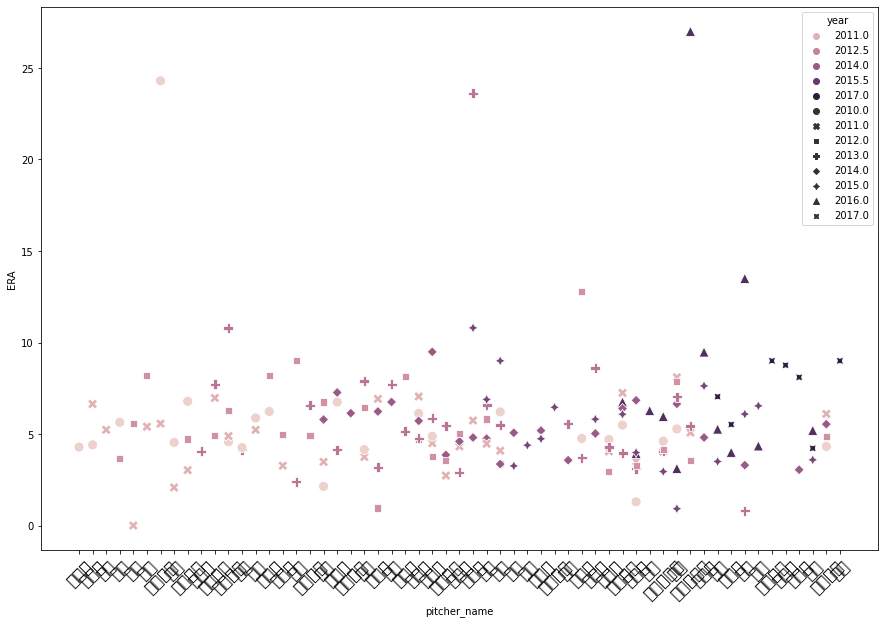

In [ ]:
plt.rcParams["figure.figsize"] = (15, 10)
sns.scatterplot(x='pitcher_name', y='ERA', hue='year', style='year', s=100, data=era_babip_fip)
plt.xlabel('pitcher_name')
plt.ylabel('ERA')
plt.xticks(fontsize=16, rotation=45)
plt.show() #분류실패

##### 군집화 - Kmeans

In [ ]:
## 군집화 모델은 최대한 다양하게 사용하기
## 비공식 등급표와 가장 비슷하게 나오는 모델을 채용
## 상대적으로 나눈 기준이 유의미한가 확인

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

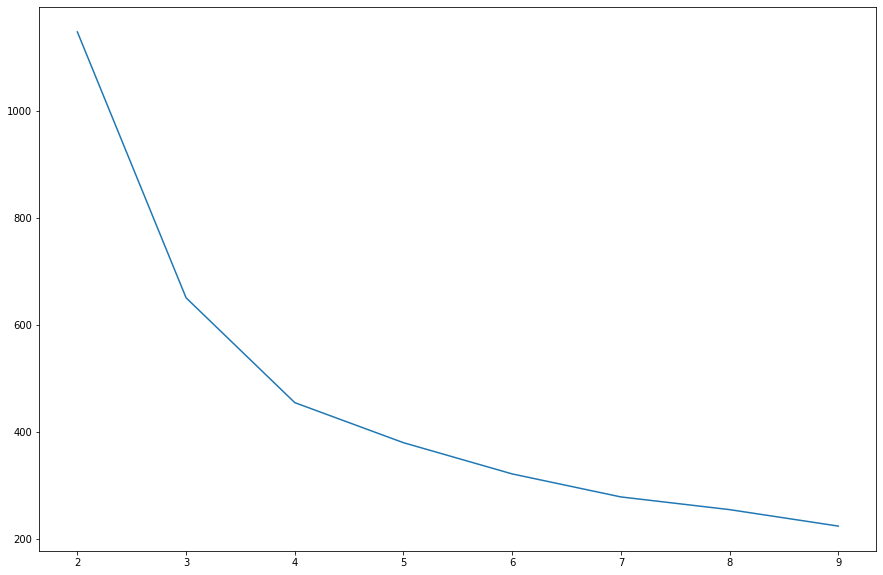

In [ ]:
## K 정하기
## 결과를 시각화해서 inertia 의 감소가 완만해지는 부분
wcss=[]
ks = range(2,10)

for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=0).fit(era_war_whip_babip_fip)
    wcss.append(kmeans.inertia_)
    
plt.plot(ks, wcss) # 3 또는 4 선택

In [ ]:
## 모델 학습
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(era_war_whip_babip_fip)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.labels_)

[2 2 0 0 2 0 2 0 0 1 0 3 2 2 2 0 2 2 0 1 0 2 2 0 1 2 2 0 0 0 0 2 0 0 2 0 0
 2 2 0 0 0 0 2 0 2 2 0 0 2 2 0 0 0 0 0 1 0 2 2 0 0 2 2 0 1 0 2 0 0 2 2 2 2
 0 0 1 0 3 2 2 0 0 0 2 2 0 2 1 0 2 2 2 2 0 0 2 0 2 2 1 2 1 0 2 2 2 2 2 0 0
 0 0 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 0 0 0 2 0 2 0 3 0 0 0 1 0 2 0 2 0
 2 0 1 2 0 0 1 1 2 1 2 0 0 2 2 0 2 0 0 1]


In [ ]:
## 결과 확인
kmeans_cluster = era_war_whip_babip_fip.assign(cluster = kmeans.labels_)
kmeans_result = kmeans_cluster.groupby('cluster')['cluster'].count()
kmeans_result

cluster
0    76
1    15
2    74
3     3
Name: cluster, dtype: int64

In [ ]:
## 산포도 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(era_war_whip_babip_fip)

kmeans_cluster['pca_x'] = pca_transformed[:, 0]
kmeans_cluster['pca_y'] = pca_transformed[:, 1]
kmeans_cluster.head(3)

,ERA,WAR,WHIP,BABIP,FIP,cluster,pca_x,pca_y
163,4.29,-0.3,1.68,0.320,5.09,2,-1.222291,-0.706432
7,4.41,1.2,1.49,0.301,4.48,2,-1.456209,0.232512
138,6.64,-0.2,1.85,0.360,5.40,0,1.049586,-0.010080


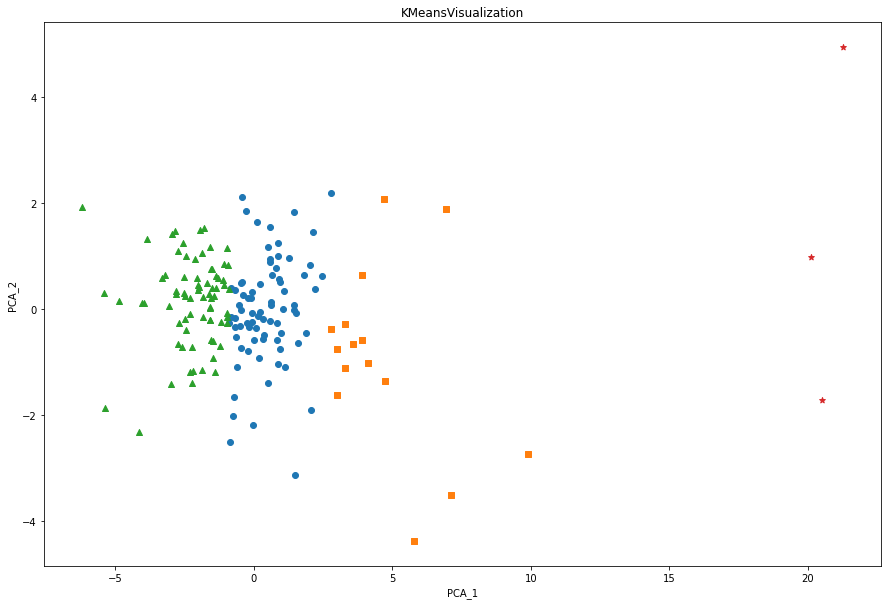

In [ ]:
marker0_ind = kmeans_cluster[kmeans_cluster['cluster']==0].index
marker1_ind = kmeans_cluster[kmeans_cluster['cluster']==1].index
marker2_ind = kmeans_cluster[kmeans_cluster['cluster']==2].index
marker3_ind = kmeans_cluster[kmeans_cluster['cluster']==3].index

plt.scatter(x=kmeans_cluster.loc[marker0_ind, 'pca_x'], y=kmeans_cluster.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=kmeans_cluster.loc[marker1_ind, 'pca_x'], y=kmeans_cluster.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=kmeans_cluster.loc[marker2_ind, 'pca_x'], y=kmeans_cluster.loc[marker2_ind, 'pca_y'], marker='^')
plt.scatter(x=kmeans_cluster.loc[marker3_ind, 'pca_x'], y=kmeans_cluster.loc[marker3_ind, 'pca_y'], marker='*')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('KMeansVisualization')
plt.show()

##### 군집평가 - Kmeans

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
## 각 데이터 포인트의 실루엣 계수를 계산해 반환
score_samples = silhouette_samples(era_war_whip_babip_fip, kmeans_cluster['cluster'])
kmeans_cluster['silhouette_coeff'] = score_samples

## 전체 데이터의 실루엣 계수 값을 평균해 반환, 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단 가능(무조건 X) 
average_score = silhouette_score(era_war_whip_babip_fip, kmeans_cluster['cluster'])
print('Silhouette Analysis Score: {0:.3f}'.format(average_score), '\n')
print(kmeans_cluster.groupby('cluster')['silhouette_coeff'].mean(), '\n')
kmeans_cluster.head(3)  #1에 가까울수록 근처군집과 많이 떨어져있다 == 군집화 잘 됨

Silhouette Analysis Score: 0.374 

cluster
0    0.391247
1    0.283348
2    0.360439
3    0.721002
Name: silhouette_coeff, dtype: float64 



,ERA,WAR,WHIP,BABIP,FIP,cluster,pca_x,pca_y,silhouette_coeff
163,4.29,-0.3,1.68,0.320,5.09,2,-1.222291,-0.706432,0.110139
7,4.41,1.2,1.49,0.301,4.48,2,-1.456209,0.232512,0.328044
138,6.64,-0.2,1.85,0.360,5.40,0,1.049586,-0.010080,0.599809


In [ ]:
## 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

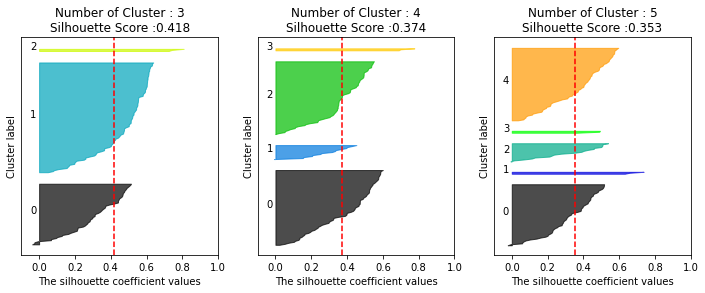

In [ ]:
visualize_silhouette([3, 4, 5], era_war_whip_babip_fip)

##### 군집화 - Mean Shift
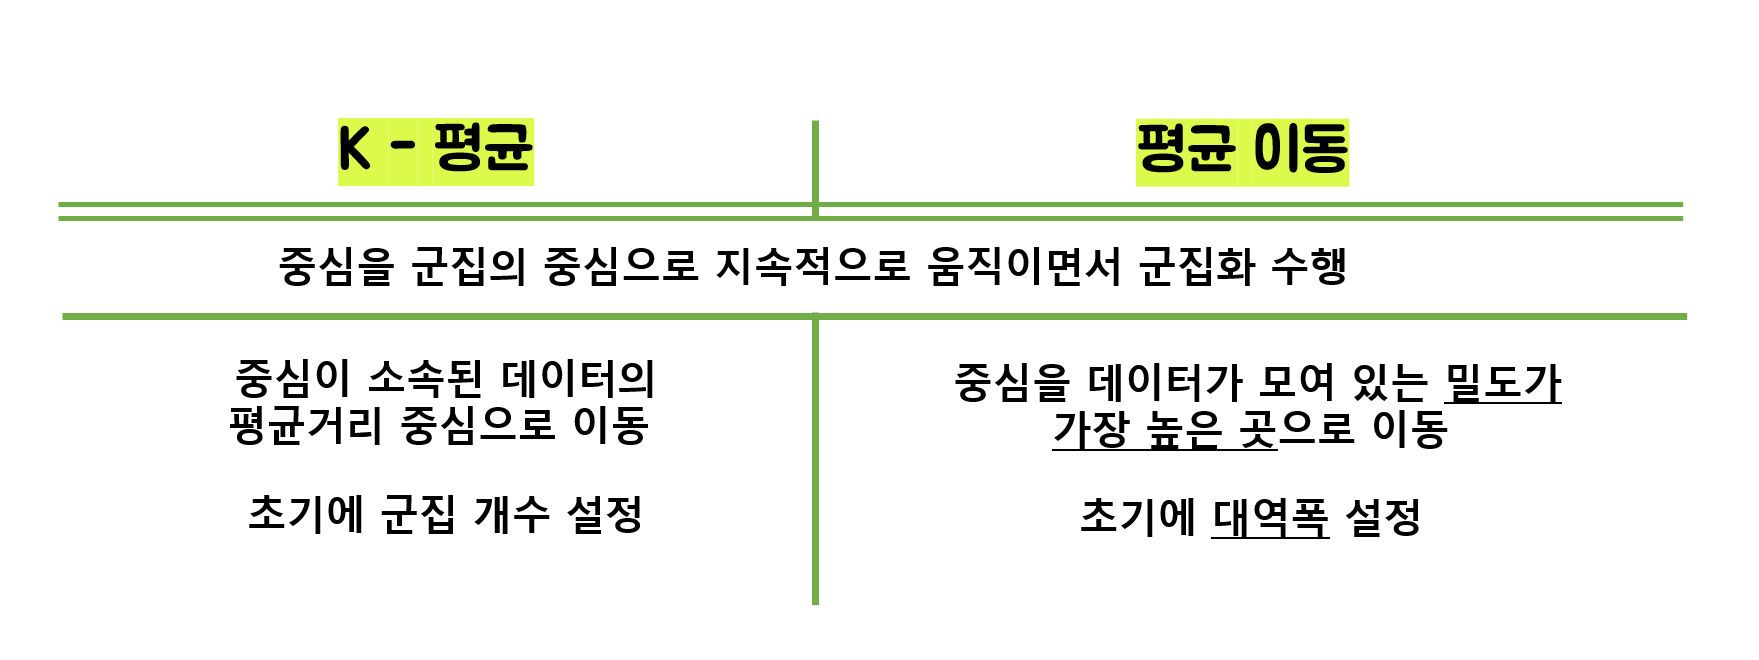

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift

In [ ]:
## 대역폭 파라미터 정하기
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(era_war_whip_babip_fip)
print(round(bandwidth,3))

2.408


In [ ]:
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit_predict(era_war_whip_babip_fip)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7])

In [ ]:
meanshift_cluster = era_war_whip_babip_fip.assign(cluster = meanshift.labels_)
meanshift_result = meanshift_cluster.groupby('cluster')['cluster'].count()
meanshift_result

cluster
0    147
1     15
2      1
3      1
4      1
5      1
6      1
7      1
Name: cluster, dtype: int64

In [ ]:
## 산포도 시각화
meanshift_cluster['pca_x'] = pca_transformed[:, 0]
meanshift_cluster['pca_y'] = pca_transformed[:, 1]
meanshift_cluster.head(3)

,ERA,WAR,WHIP,BABIP,FIP,cluster,pca_x,pca_y
163,4.29,-0.3,1.68,0.320,5.09,0,-1.222291,-0.706432
7,4.41,1.2,1.49,0.301,4.48,0,-1.456209,0.232512
138,6.64,-0.2,1.85,0.360,5.40,0,1.049586,-0.010080


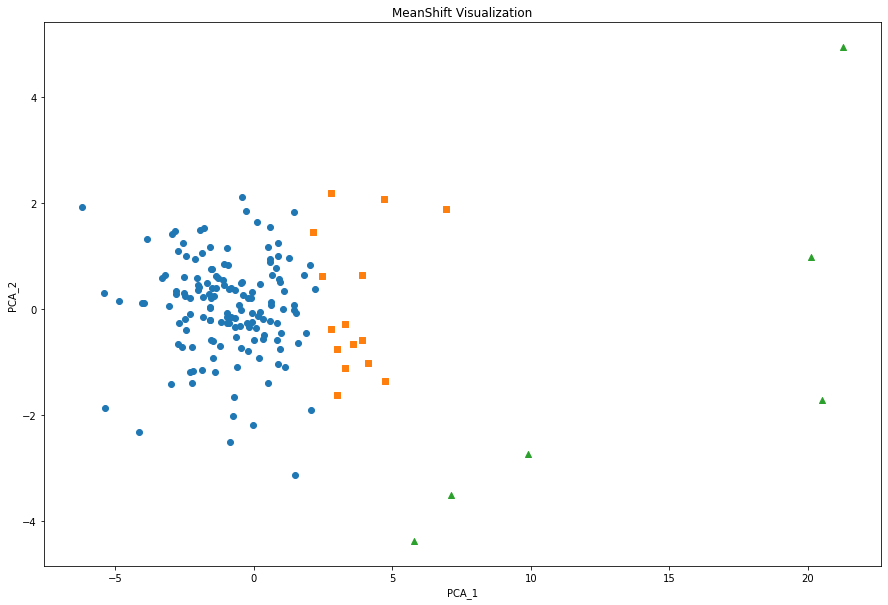

In [ ]:
# 중심점 그리기
# centers = meanshift.cluster_centers_
# unique_labels = np.unique(meanshift_cluster)
# markers = ['o', 's', '^']

# for label in unique_labels:
#   centers_x_y = centers[label]
#   plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])

marker0_ind = meanshift_cluster[meanshift_cluster['cluster']==0].index
marker1_ind = meanshift_cluster[meanshift_cluster['cluster']==1].index
marker2_ind = meanshift_cluster[meanshift_cluster['cluster'].isin([2, 3, 4, 5, 6, 7])].index

plt.scatter(x=meanshift_cluster.loc[marker0_ind, 'pca_x'], y=meanshift_cluster.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=meanshift_cluster.loc[marker1_ind, 'pca_x'], y=meanshift_cluster.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=meanshift_cluster.loc[marker2_ind, 'pca_x'], y=meanshift_cluster.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('MeanShift Visualization')
plt.show()

##### 군집화 - GMM

In [ ]:
from sklearn.mixture import GaussianMixture

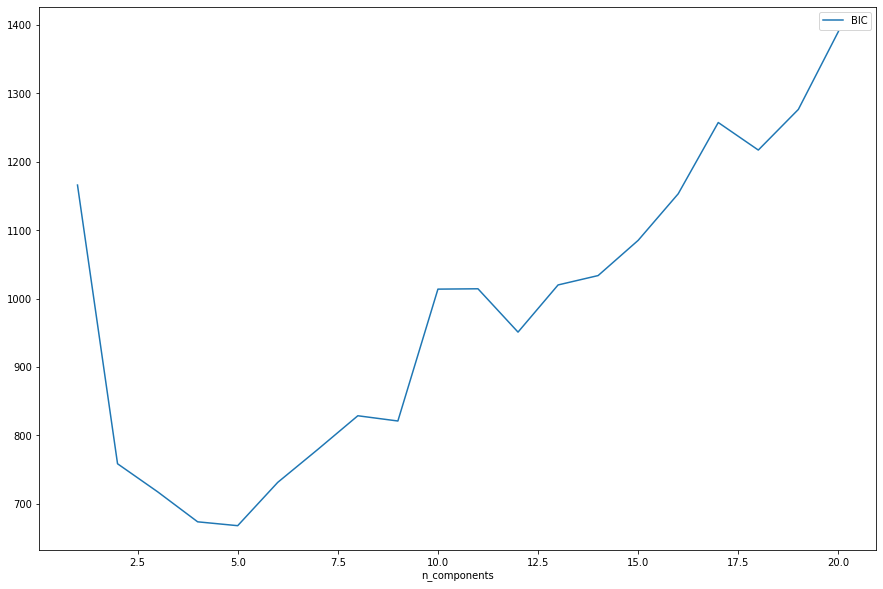

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(era_war_whip_babip_fip)for n in n_components]

plt.plot(n_components, [m.bic(era_war_whip_babip_fip) for m in models], label='BIC')
#plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
gmm = GaussianMixture(n_components=5, random_state=0).fit(era_war_whip_babip_fip)
gmm_cluster_labels = gmm.predict(era_war_whip_babip_fip)

gmm_cluster = era_war_whip_babip_fip.assign(cluster = gmm_cluster_labels)

gmm_result = gmm_cluster.groupby('cluster')['cluster'].value_counts()
gmm_result

cluster  cluster
0        0          76
1        1           4
2        2          31
3        3           3
4        4          54
Name: cluster, dtype: int64

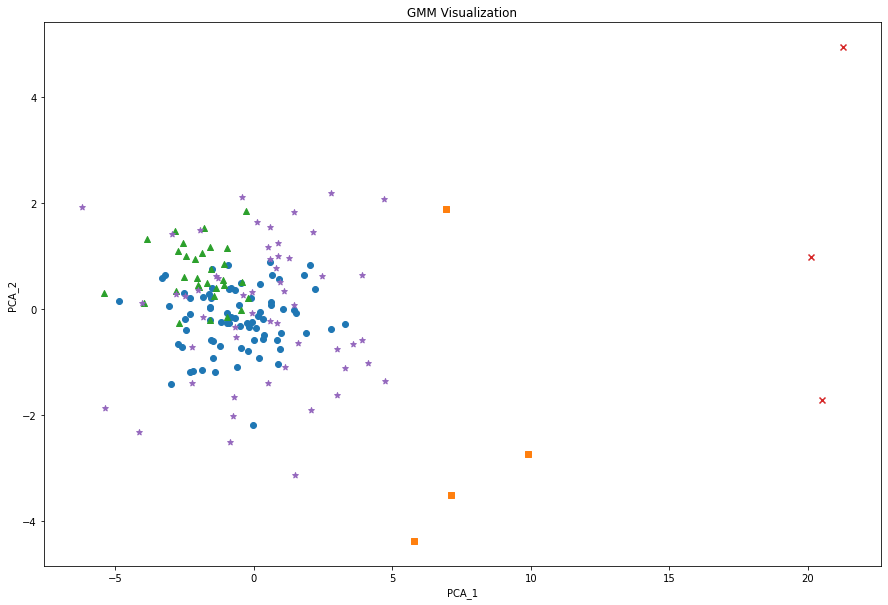

In [ ]:
## 산포도 시각화
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(era_war_whip_babip_fip)

gmm_cluster['pca_x'] = pca_transformed[:, 0]
gmm_cluster['pca_y'] = pca_transformed[:, 1]
gmm_cluster.head(3)

marker0_ind = gmm_cluster[gmm_cluster['cluster']==0].index
marker1_ind = gmm_cluster[gmm_cluster['cluster']==1].index
marker2_ind = gmm_cluster[gmm_cluster['cluster']==2].index
marker3_ind = gmm_cluster[gmm_cluster['cluster']==3].index
marker4_ind = gmm_cluster[gmm_cluster['cluster']==4].index

plt.scatter(x=gmm_cluster.loc[marker0_ind, 'pca_x'], y=gmm_cluster.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=gmm_cluster.loc[marker1_ind, 'pca_x'], y=gmm_cluster.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=gmm_cluster.loc[marker2_ind, 'pca_x'], y=gmm_cluster.loc[marker2_ind, 'pca_y'], marker='^')
plt.scatter(x=gmm_cluster.loc[marker3_ind, 'pca_x'], y=gmm_cluster.loc[marker3_ind, 'pca_y'], marker='x')
plt.scatter(x=gmm_cluster.loc[marker4_ind, 'pca_x'], y=gmm_cluster.loc[marker4_ind, 'pca_y'], marker='*')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('GMM Visualization')
plt.show()

##### 군집화 - DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

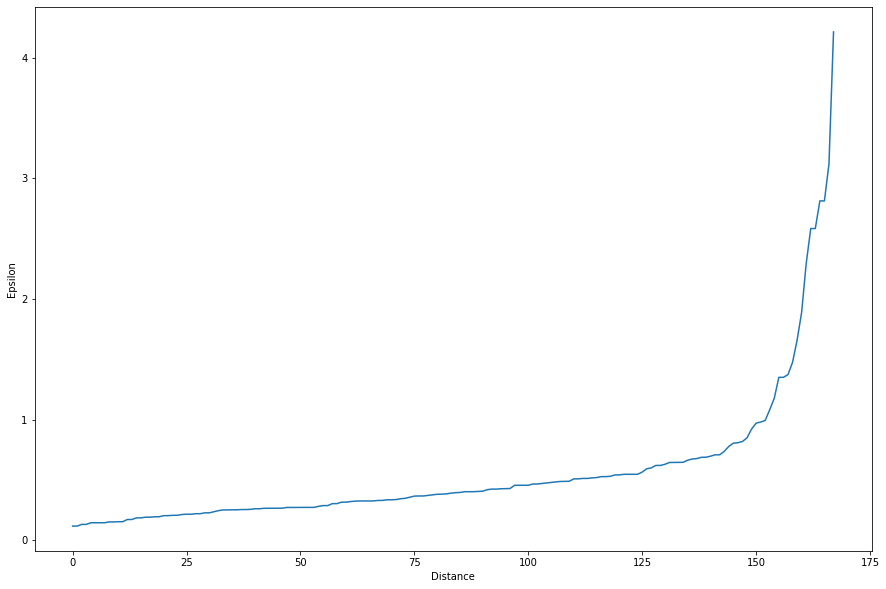

In [ ]:
## 최적 파라미터
# eps의 값을 "크게 하면" 반경이 넓!, 포함 데이터 많!, "노이즈 개수 적!"
# min_sample를 "크게 하면" 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 "노이즈 데이터 개수 많!"

# we use nearestneighbors for calculating distance between points
from sklearn.neighbors import NearestNeighbors

# calculating distances
neigh=NearestNeighbors(n_neighbors=2)
distance=neigh.fit(era_war_whip_babip_fip)

# indices and distance values
distances,indices=distance.kneighbors(era_war_whip_babip_fip)

# Now sorting the distance increasing order
sorting_distances=np.sort(distances,axis=0)

# sorted distances
sorted_distances = sorting_distances[:,1]
# plot between distance vs epsilon
plt.plot(sorted_distances)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show() #그래프가 급격히 상승하는 최적의 거리 epsilon를 선택

In [ ]:
# 질문 eps는 일반적으로 1이하의 값이라고..

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=3, metric='euclidean') #데이터수가 많지 않으면 2~3
dbscan_labels = dbscan.fit_predict(era_war_whip_babip_fip)

In [ ]:
dbscan_cluster = era_war_whip_babip_fip.assign(cluster = dbscan_labels)

dbscan_result = dbscan_cluster.groupby('cluster')['cluster'].value_counts()
dbscan_result

cluster  cluster
-1       -1          31
 0        0         122
 1        1           5
 2        2           4
 3        3           3
 4        4           3
Name: cluster, dtype: int64

##### 군집화 마무리
 - kmeans결과 및 평가지표(war, whip)

In [ ]:
## 선택한 클러스터 모델 결과
kmeans_label = kmeans_cluster.drop(['ERA', 'WAR', 'WHIP', 'BABIP', 'FIP', 'pca_x', 'pca_y',	'silhouette_coeff'], axis=1)
kmeans_label.head()

,cluster
163,2
7,2
138,0
55,0
48,2


In [ ]:
## 클러스터 결과 칼럼 추가
final_cluster = mlb_before_kbo.assign(cluster = kmeans_label).astype({'year': int})
final_cluster

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%,cluster
163,mlb,니퍼트,2010,4.29,-0.3,262.0,61.0,7.0,34.0,5.0,47.0,1.68,0.320,5.09,0.267,0.320,0.666,0.099,0.082,0.423,2
7,mlb,탈보트,2010,4.41,1.2,696.0,169.0,13.0,69.0,8.0,88.0,1.49,0.301,4.48,0.169,0.478,0.495,0.070,0.060,0.428,2
138,mlb,탈보트,2011,6.64,-0.2,299.0,90.0,10.0,28.0,3.0,36.0,1.85,0.360,5.40,0.246,0.425,0.448,0.120,0.049,0.446,0
55,mlb,소사,2011,5.23,0.2,231.0,54.0,7.0,23.0,3.0,38.0,1.44,0.294,4.77,0.179,0.444,0.615,0.148,0.090,0.454,0
48,mlb,세든,2012,3.67,0.3,147.0,35.0,2.0,13.0,0.0,18.0,1.40,0.289,3.94,0.250,0.414,0.585,0.154,0.095,0.467,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,mlb,듀브론트,2015,5.50,0.4,328.0,87.0,10.0,26.0,1.0,56.0,1.50,0.328,4.45,0.189,0.471,0.556,0.099,0.097,0.452,0
56,mlb,듀브론트,2010,4.32,0.2,113.0,27.0,3.0,10.0,1.0,23.0,1.48,0.316,4.12,0.103,0.474,0.717,0.091,0.069,0.432,2
121,mlb,듀브론트,2011,6.10,-0.1,47.0,12.0,1.0,8.0,0.0,6.0,1.94,0.344,5.44,0.281,0.438,0.674,0.111,0.056,0.382,0
164,mlb,듀브론트,2014,5.54,-0.3,364.0,91.0,12.0,33.0,2.0,51.0,1.56,0.297,5.13,0.225,0.380,0.578,0.112,0.070,0.429,0


In [ ]:
final_cluster.groupby(['cluster'])['pitcher_name'].count()

cluster
0    76
1    15
2    74
3     3
Name: pitcher_name, dtype: int64

In [ ]:
## 각 그룹 별로 특징이 있는지 찾기
cluster_0 = final_cluster[final_cluster['cluster']==0]
cluster_1 = final_cluster[final_cluster['cluster']==1]
cluster_2 = final_cluster[final_cluster['cluster']==2]
cluster_3 = final_cluster[final_cluster['cluster']==3]

cluster_0

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%,cluster,WAR_Grade,WHIP_Grade
138,mlb,탈보트,2011,6.64,-0.2,299.0,90.0,10.0,28.0,3.0,36.0,1.85,0.360,5.40,0.246,0.425,0.448,0.120,0.049,0.446,0,scrub,awful
55,mlb,소사,2011,5.23,0.2,231.0,54.0,7.0,23.0,3.0,38.0,1.44,0.294,4.77,0.179,0.444,0.615,0.148,0.090,0.454,0,scrub,poor
141,mlb,세든,2010,5.64,-0.2,95.0,21.0,4.0,10.0,0.0,16.0,1.39,0.262,5.32,0.159,0.478,0.618,0.120,0.096,0.442,0,scrub,below_average
94,mlb,해커,2012,5.59,0.0,45.0,14.0,2.0,2.0,1.0,8.0,1.66,0.375,5.06,0.364,0.394,0.496,0.000,0.092,0.489,0,scrub,awful
120,mlb,아담,2011,5.40,-0.1,57.0,14.0,3.0,3.0,0.0,10.0,1.27,0.268,5.13,0.273,0.273,0.527,0.050,0.086,0.502,0,scrub,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,mlb,베렛,2017,4.22,-0.3,47.0,11.0,3.0,3.0,2.0,9.0,1.31,0.267,6.53,0.133,0.367,0.494,0.000,0.147,0.494,0,scrub,average
194,mlb,베렛,2016,5.20,-0.6,406.0,100.0,16.0,43.0,4.0,66.0,1.56,0.303,5.51,0.227,0.441,0.562,0.032,0.086,0.470,0,scrub,awful
35,mlb,듀브론트,2015,5.50,0.4,328.0,87.0,10.0,26.0,1.0,56.0,1.50,0.328,4.45,0.189,0.471,0.556,0.099,0.097,0.452,0,scrub,poor
121,mlb,듀브론트,2011,6.10,-0.1,47.0,12.0,1.0,8.0,0.0,6.0,1.94,0.344,5.44,0.281,0.438,0.674,0.111,0.056,0.382,0,scrub,awful


In [ ]:
## year
from collections import Counter

print(Counter(cluster_0['year']))
print(Counter(cluster_1['year']))
print(Counter(cluster_2['year']))
print(Counter(cluster_3['year']))

Counter({2011: 13, 2014: 13, 2012: 12, 2013: 11, 2010: 9, 2015: 9, 2016: 6, 2017: 3})
Counter({2017: 4, 2012: 3, 2013: 3, 2015: 2, 2016: 2, 2014: 1})
Counter({2011: 15, 2013: 14, 2010: 13, 2012: 12, 2014: 10, 2015: 7, 2016: 3})
Counter({2010: 1, 2013: 1, 2016: 1})


In [ ]:
final_cluster['ERA'].sort_values()

85      0.00
26      0.82
27      0.92
115     0.96
15      1.30
       ...  
131    12.79
132    13.50
175    23.62
134    24.30
107    27.00
Name: ERA, Length: 168, dtype: float64

In [ ]:
## ERA
def divide_point_5(df):

  for i in range(len(df)):
    






6.092368421052631
9.556666666666667
3.718378378378378
24.973333333333333


In [ ]:
## 평가지표 있는 변수
war = war.rename(columns={'WAR':'WAR_Grade'})
whip = whip.rename(columns={'WHIP':'WHIP_Grade'})
final_cluster['WAR_Grade'] = war['WAR_Grade']
final_cluster['WHIP_Grade'] = whip['WHIP_Grade']
final_cluster

,stage,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%,cluster,WAR_Grade,WHIP_Grade
163,mlb,니퍼트,2010,4.29,-0.3,262.0,61.0,7.0,34.0,5.0,47.0,1.68,0.320,5.09,0.267,0.320,0.666,0.099,0.082,0.423,2,scrub,awful
7,mlb,탈보트,2010,4.41,1.2,696.0,169.0,13.0,69.0,8.0,88.0,1.49,0.301,4.48,0.169,0.478,0.495,0.070,0.060,0.428,2,role_player,poor
138,mlb,탈보트,2011,6.64,-0.2,299.0,90.0,10.0,28.0,3.0,36.0,1.85,0.360,5.40,0.246,0.425,0.448,0.120,0.049,0.446,0,scrub,awful
55,mlb,소사,2011,5.23,0.2,231.0,54.0,7.0,23.0,3.0,38.0,1.44,0.294,4.77,0.179,0.444,0.615,0.148,0.090,0.454,0,scrub,poor
48,mlb,세든,2012,3.67,0.3,147.0,35.0,2.0,13.0,0.0,18.0,1.40,0.289,3.94,0.250,0.414,0.585,0.154,0.095,0.467,2,scrub,below_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,mlb,듀브론트,2015,5.50,0.4,328.0,87.0,10.0,26.0,1.0,56.0,1.50,0.328,4.45,0.189,0.471,0.556,0.099,0.097,0.452,0,scrub,poor
56,mlb,듀브론트,2010,4.32,0.2,113.0,27.0,3.0,10.0,1.0,23.0,1.48,0.316,4.12,0.103,0.474,0.717,0.091,0.069,0.432,2,scrub,poor
121,mlb,듀브론트,2011,6.10,-0.1,47.0,12.0,1.0,8.0,0.0,6.0,1.94,0.344,5.44,0.281,0.438,0.674,0.111,0.056,0.382,0,scrub,awful
164,mlb,듀브론트,2014,5.54,-0.3,364.0,91.0,12.0,33.0,2.0,51.0,1.56,0.297,5.13,0.225,0.380,0.578,0.112,0.070,0.429,0,scrub,awful


cluster  WAR_Grade   
0        role_player      1
         scrub           75
1        scrub           15
2        good_player      2
         role_player      6
         scrub           63
         solid_stater     3
3        scrub            3
Name: WAR_Grade, dtype: int64


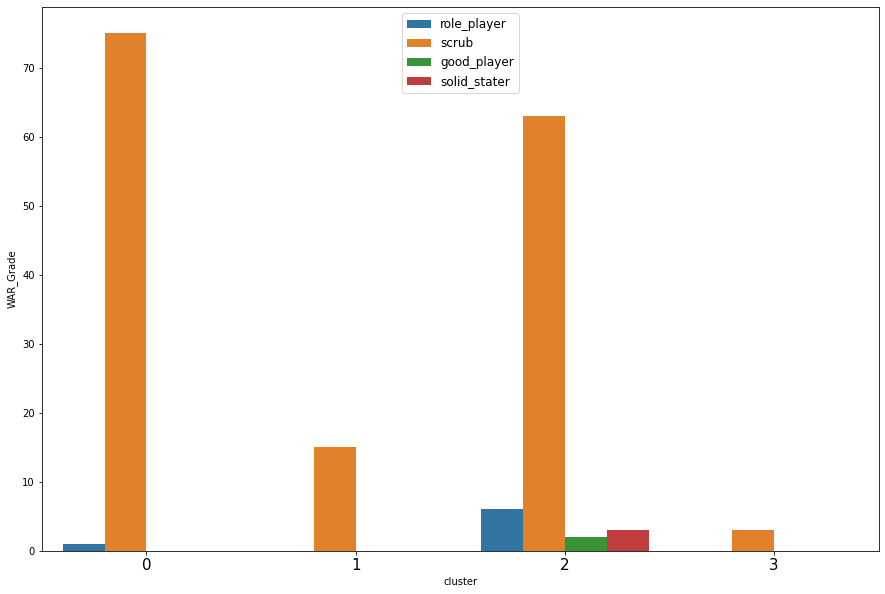

In [ ]:
## WAR_Grade
war_group_ = final_cluster.groupby(['cluster', 'WAR_Grade'])['WAR_Grade'].count()
war_group = pd.DataFrame(war_group_)
war_group = war_group.rename(columns={'WAR_Grade':'WAR_Count'}).reset_index()
print(war_group_)

sns.barplot(x='cluster', y='WAR_Count', hue='WAR_Grade', data=war_group) # default : dodge=True
plt.legend(fontsize=12)
plt.xlabel('cluster')
plt.ylabel('WAR_Grade')
plt.xticks(fontsize=15)
plt.show()

cluster  WHIP_Grade   
0        above_average     2
         average           2
         awful            51
         below_average     7
         poor             14
1        awful            13
         below_average     1
         poor              1
2        above_average    18
         average           5
         awful            10
         below_average    16
         excellent         3
         great             4
         poor             18
3        awful             3
Name: WHIP_Grade, dtype: int64


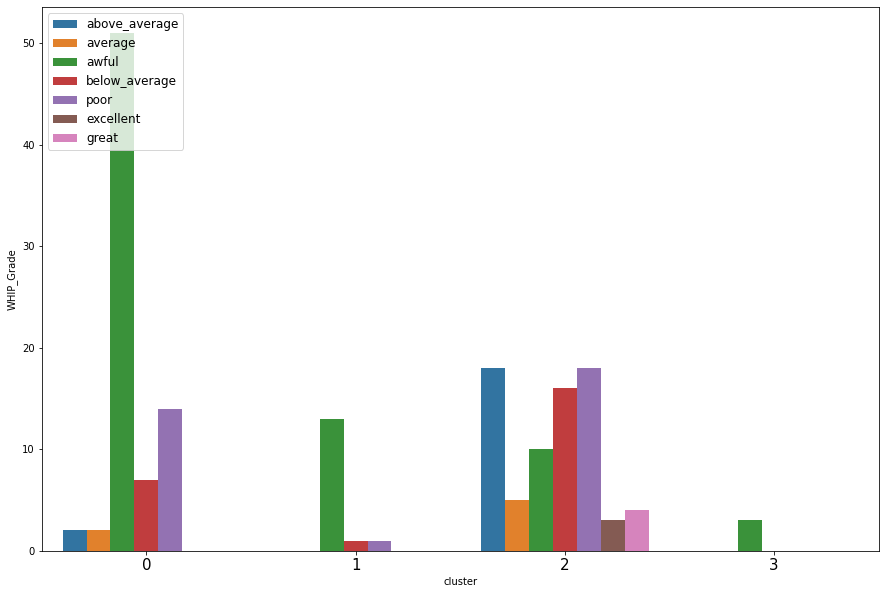

In [ ]:
## WHIP_Grade
whip_group_ = final_cluster.groupby(['cluster', 'WHIP_Grade'])['WHIP_Grade'].count()
whip_group = pd.DataFrame(whip_group_)
whip_group = whip_group.rename(columns={'WHIP_Grade':'WHIP_Count'}).reset_index()
print(whip_group_)

sns.barplot(x='cluster', y='WHIP_Count', hue='WHIP_Grade', data=whip_group) # default : dodge=True
plt.legend(fontsize=12)
plt.xlabel('cluster')
plt.ylabel('WHIP_Grade')
plt.xticks(fontsize=15)
plt.show()

#### c. 문자열

*   pitcher_name, year
*   game_date, pitcher,	events,	description, p_throws, pitch_name
*   batter(타), stand(타), bb_type(타)



In [ ]:
statcast_before_kbo

In [ ]:
def pitcher_feature(df):

  #연도-날짜 열 생성
  df['year_month'] = df['game_date'].str.slice(stop=7) 

  speed = pd.DataFrame()
  hand = pd.DataFrame()
  pitch = pd.DataFrame()

    ## 선수별 시간에 따른 구속 변화
  speed_mean = df.groupby(['pitcher_name', 'year_month'])['release_speed'].mean()
  speed_mean = pd.DataFrame(speed_mean)
  speed_mean = speed_mean.reset_index(drop=False, inplace=False)

  speed = pd.concat([speed,speed_mean],axis=0)

    ## 투수의 손잡이 빈도
  hand_freq = df.groupby(['pitcher_name', 'p_throws'])['p_throws'].count()
  hand_freq = pd.DataFrame(hand_freq)
  hand_freq.columns = ['count']
  hand_freq = hand_freq.reset_index(drop=False, inplace=False)

  hand = pd.concat([hand,hand_freq],axis=0)

   ## 투수의 구종 빈도
  pitch_freq = df.groupby(['pitcher_name', 'pitch_name'])['pitch_name'].count()
  pitch_freq = pd.DataFrame(pitch_freq)
  pitch_freq.columns = ['count']
  pitch_freq = pitch_freq.reset_index(drop=False, inplace=False)

  pitch = pd.concat([pitch,pitch_freq],axis=0)

  return speed, hand, pitch

In [ ]:
speed_before_kbo, hand_before_kbo, pitch_before_kbo = pitcher_feature(statcast_before_kbo)

In [ ]:
speed_before_kbo

In [ ]:
hand_before_kbo.head(10)

In [ ]:
pitch_before_kbo

## #4. KBO 입성 이후 필드변동 3가지로 나눠서 분석(적응하면서 변화한 성향 위주)

     1.   다시 MLB로 돌아간 경우 -> 몇년 후에 돌아갔는지 / 왜 돌아갔는지(?) / KBO입성이후 달라진 특징이 있는지
     2.   KBO에서만 활동한 경우 -> 몇년동안 활동을 했는지 / KBO 영입 이전 MLB 활동 특징 vs KBO 영입 이후 특징
     3.   MLB와 KBO 모두 활동한 경우(연도 교차) -> 몇년동안 KBO에서 활동을 지속했는지 / MLB에서 몇년동안 활동하고 다시 KBO로 돌아왔는지 / KBO 영입 이전 MLB 활동 특징 vs KBO 영입 이후 특징 vs mlb로 돌아간 후의 특징 / (KBO에서만 특정하게 쓰는 투구가 있다던지)

##### (데이터 분류)

In [ ]:
## kbo_mlb_18 | mlb_kbo_18
## 2번 KBO에서만 활동한 경우는 kbo_18도 봐야함

In [ ]:
def field_change(kbo, mlb):

  go_home = []
  kbo_ward = []
  batman = []

  for i in kbo.pitcher_name.unique():
    kbo_pitcher = kbo[kbo['pitcher_name']==i]
    mlb_pitcher = mlb[mlb['pitcher_name']==i]

    if kbo_pitcher['year'].max() <= mlb_pitcher['year'].min(): # mlb로 돌아간 경우 
     go_home.append(str(i))

    elif kbo_pitcher['year'].min() >= mlb_pitcher['year'].max(): # kbo에서만 활동한 경우
     kbo_ward.append(str(i))
    
    else: # 교차로 활동한 경우
     batman.append(str(i))

  return go_home, kbo_ward, batman

In [ ]:
only_mlb, only_kbo, warigari = field_change(kbo_mlb_18, mlb_kbo_18)

### (1) 다시 MLB로 돌아간 경우



1. 몇년 후에 돌아갔는지
2. 왜 돌아갔는지(?)
3. KBO입성이후 달라진 특징이 있는지


In [ ]:
# 해당되는 선수
only_mlb

In [ ]:
# 사용할 데이터
kbo__only_mlb = kbo_mlb_18[kbo_18['pitcher_name'].isin(only_mlb)]
mlb__only_mlb = mlb_kbo_18[mlb_18['pitcher_name'].isin(only_mlb)]
kbo__only_mlb
# mlb__only_mlb

In [ ]:
mlb__only_mlb

### (2) KBO에서만 활동한 경우

1. 몇년동안 활동을 했는지
2. KBO 영입 이전 MLB 활동 특징
3. KBO 영입 이후 특징
4. KBO 내 팀 이전

In [ ]:
# 해당되는 선수
len(only_kbo)

In [ ]:
# 사용할 데이터
kbo__only_kbo = kbo_mlb_18[kbo_18['pitcher_name'].isin(only_kbo)]
mlb__only_kbo = mlb_kbo_18[mlb_18['pitcher_name'].isin(only_kbo)]
kbo__only_kbo#.groupby('pitcher_name')['pitcher_name'].count()
# mlb__only_kbo

#### a. 몇년동안 활동을 했는가

In [ ]:
kbo_over_2 = pd.DataFrame()
kbo_under_2 = pd.DataFrame()

for i in kbo_yearly['pitcher_name'].unique():

  a = len(kbo_yearly[kbo_yearly['pitcher_name'] == i])

  if a >= 2:

    b = kbo_yearly[kbo_yearly['pitcher_name'] == i]
    kbo_over_2 = pd.concat([kbo_over_2, b], axis = 0)

  else:

    c = kbo_yearly[kbo_yearly['pitcher_name'] == i]
    kbo_under_2 = pd.concat([kbo_under_2, c], axis = 0)

In [ ]:
def how_long(df):
  
  period = pd.DataFrame(data=df.pitcher_name.unique(), columns=['pitcher_name'])
  period['period'] = 0
  sequence = []
  unit = []

  for i in df.pitcher_name.unique():
    kbo_pitcher = df[df['pitcher_name']==i]
    kbo_pitcher.sort_values(by=['year'], axis=0, inplace=True)
    kbo_pitcher.reset_index(inplace=True)

    # 연속되는 연도끼리 묶기
    year_list = kbo_pitcher.year.to_list()
    start = year_list.pop(0)
    unit.append(start)

    while(len(year_list)>0):
      subject = year_list.pop(0)

      if start+1 == subject:
        unit.append(int(subject))
        start = subject

      else:
        sequence.append(unit)
        unit = []
        unit.append(int(subject))
        start = subject

    sequence.append(unit)

    # 연속계약 유무
    if len(sequence) < 2:
      during = max(sequence[0]) - min(sequence[0])
      period['period'] = during
      # period = pd.concat([period]) 
    
    else:
      during_list = []
      for j in range(len(sequence)):
        during_list = str(len(sequence[j])) + " /" 

      period['period'] = during_list

  return period

In [ ]:
how_long(kbo__only_kbo).head(10) #??????????

In [ ]:
########## for문 테스트
test = kbo__only_kbo[kbo__only_kbo['pitcher_name']=='세든'] #세든
test.reset_index(inplace=True)
test = test.year.to_list()
test

In [ ]:
sequence = []
unit = []

start = test.pop(0)
unit.append(start)


while(len(test)>0):
	subject = test.pop(0)

	if start+1 == subject:
		unit.append(int(subject))
		start = subject

	else:
		sequence.append(unit)
		unit = []
		unit.append(int(subject))
		start = subject
sequence.append(unit)


In [ ]:
sequence

#### d. KBO활동 중 팀 이전

In [ ]:
kbo__only_kbo
# mlb__only_kbo

In [ ]:
team_change = kbo__only_kbo.groupby(['pitcher_name', 'team'])['team'].count()
team_change = pd.DataFrame(team_change)
team_change = team_change.rename(columns={'team':'team_move'}).reset_index()
team_change.head(20)

In [ ]:
## 가장오래 활동한 팀
team_change.groupby('pitcher_name')['team', 'team_move'].max()
# 탈보트는 삼성, 한화 각각 1년씩

### (3) MLB와 KBO 모두 활동한 경우(연도 교차)

1. 몇년동안 KBO에서 활동을 지속했는지
2. MLB에서 몇년동안 활동하고 다시 KBO로 돌아왔는지
3. KBO 영입 이전 MLB 활동 특징 vs KBO 영입 이후 특징 vs mlb로 돌아간 후의 특징
    - (KBO에서만 특정하게 쓰는 투구가 있다던지)
4. KBO 내 팀 이전

In [ ]:
# 해당되는 선수
len(warigari)

In [ ]:
# 사용할 데이터
kbo__warigari = kbo_mlb_18[kbo_18['pitcher_name'].isin(warigari)]
mlb__warigari = mlb_kbo_18[mlb_18['pitcher_name'].isin(warigari)]
kbo__warigari#.groupby('pitcher_name')['pitcher_name'].count()
#mlb__warigari

## #5. 팀별 특성

* '팀' 별로 어떤 선수를 선호하는지 분석 -> 주력전략, 성향 파악근거(ex. 구속이 ~이상의 투수를 선호한다.)
* 한 팀에서 짧은 기간(2년) 활동했던 선수들을 분석해서, 팀 반대성향으로 정의 (비약주의) 

In [ ]:
kbo_mlb_18[kbo_mlb_18['team']==두산]

In [ ]:
team_chart = kbo_mlb_18.groupby(['team','pitcher_name'])['pitcher_name'].count()
team_chart = pd.DataFrame(team_chart)
team_chart = team_chart.rename(columns={'pitcher_name':'team_stay'}).reset_index()
team_chart.head(20)